# **Introduzione: Trading di Standard&Poor 500**, indice azionario
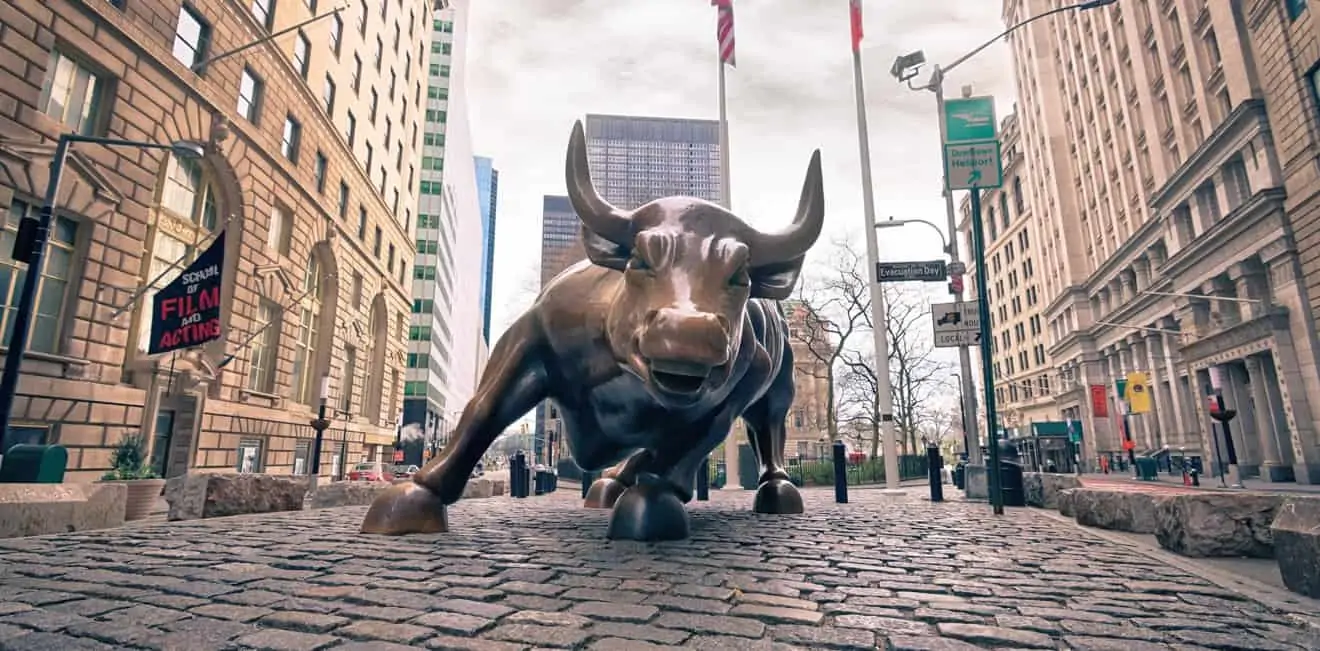

*Task del progetto:* Costruire istanze giornaliere di dati relativi all'andamento borsistico al fine di identificare, attraverso modelli di machine learning per task di classificazione binaria, compravendite profittevoli o meno.

Ecco un riassunto dei passaggi che abbiamo svolto:

1. **Esplorazione dei dati grezzi e della loro struttura**
  - Abbiamo visualizzato i dati grezzi presenti nei csv, ne abbiamo studiato il contenuto e la struttura, abbiamo visto come sono organizzati. Quindi abbiamo fatto qualche grafico per meglio comprenderli. Inoltre abbiamo generato dei report per la valutazione di eventuali anomalie.

2. **Calcolo di indicatori statistici per le aziende dell'S&P500**:
   - Questa fase consiste nel processo di featuers engineering che ha sintetizzato le nostre features che caratterizzano le istanze del task.
   Abbiamo calcolato indicatori tecnici come volatilità, medie mobili semplici (SMA), medie mobili esponenziali (EMA), Momentum (MOM), Relative Strength Index (RSI), Rate of Change (ROC), stocastico %K e %D, MACD, Williams %R, Accumulation/Distribution (A/D) e CCI su diverse finestre temporali.
  
3. **Classificazione tramite la tripla barriera**:
   - È stato implementato il metodo della tripla barriera per classificare i trade profittevoli, usando volatilità a 10 giorni come barriera superiore e inferiore e con un limite temporale di 10 giorni. Questo processo ha permesso la sintesi della nostra classe binaria.

4. **Preparazione dei dati per il Machine Learning**:
   - Abbiamo discusso dell'importanza della normalizzazione e standardizzazione degli indicatori, tranne per alcuni campi come il prezzo `Close` e il giorno della settimana.
   - È stato utilizzato un approccio per la suddivisione del dataset in training, validation e test set, rispettando l'ordine temporale delle serie storiche.

4. **Sperimentazione con modelli di classificazione**:
   - Abbiamo considerato vari modelli di Machine Learning come Random Forest, Support Vector Machines (SVM) e reti neurali.
   - Abbiamo condotto diverse sperimentazioni rispetto all'uso di diversi modelli, per tipo, configurazione e complessità.
   - Inoltre abbiamo anche esplorato diverse configurazioni circa i parametri dei modelli attraverso metodi di ottimizzazione per l'hyperparameting tuning.
   - Discussione sull'uso di tecniche di ensemble per combinare modelli differenti.

5. **Confronto tra i modelli**:
   - Rispetto ai risultati ottenuti da ciascun modello abbiamo operato un confronto tra essi rispetto a diverse metriche; abbiamo quindi fatto dei commenti e osservazioni su questi confronti.

6. **Clustering delle istanze profittevoli**:
   - È stata introdotta la possibilità di usare il clustering per identificare gruppi di trade profittevoli e confrontare le predizioni di più modelli in base all'appartenenza ai cluster.

In [1]:
!pip install ydata-profiling optuna-integration optuna scikeras ydata-profiling xgboost scikit-learn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 38.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=36887bafd289c723325e0bf06d8295967e30c0aed35f1397108a6e5b4c79bbdc
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d

# I dati

## Presentazione delle informazioni

*   Voce elenco
*   Voce elenco


*   Esploriamo i file caricati, loro struttura e contenuto.
*   Head, dimensioni e grafici esplicativi.



In [2]:
# import
import pandas as pd
import numpy as np


from ydata_profiling import ProfileReport

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# connessione al drive di google per poter accedere ai file csv con i dati
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# caricamento dai file csv dei dati grezzi
df_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/S&P500_dataset/sp500_companies.csv')
df_index = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/S&P500_dataset/sp500_index.csv')
df_stocks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/S&P500_dataset/sp500_stocks.csv')


In [5]:
# converto la colonna Date da tipo stringa al tipo datetime
df_index['Date'] = pd.to_datetime(df_index['Date'])
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])

### Head e contenuto dei csv di partenza

Nota: dati dei diversi file non allineati temporlamente, non iniziano e finiscono nella stessa data, sono state droppate alcune righe per garantire l'allineamento dei dati.

Il dataset risultante copre 10 anni di dati, fino all'anno corrente.


In [6]:
# display dei dati grezzi
df_info.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,441.06,3278094467072,1.259820e+11,0.170,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.064747
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,213.07,3267236724736,1.296290e+11,-0.043,Cupertino,CA,United States,150000.0,"Apple Inc. designs, manufactures, and markets ...",0.064532
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,125.20,3079707295744,4.927500e+10,2.621,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.060828
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,179.56,2208336707584,1.097230e+11,0.154,Mountain View,CA,United States,180895.0,Alphabet Inc. offers various products and plat...,0.043618
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,177.79,2206000480256,1.097230e+11,0.154,Mountain View,CA,United States,180895.0,Alphabet Inc. offers various products and plat...,0.043571


In [7]:
df_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             503 non-null    object 
 1   Symbol               503 non-null    object 
 2   Shortname            503 non-null    object 
 3   Longname             503 non-null    object 
 4   Sector               503 non-null    object 
 5   Industry             503 non-null    object 
 6   Currentprice         503 non-null    float64
 7   Marketcap            503 non-null    int64  
 8   Ebitda               474 non-null    float64
 9   Revenuegrowth        502 non-null    float64
 10  City                 503 non-null    object 
 11  State                484 non-null    object 
 12  Country              503 non-null    object 
 13  Fulltimeemployees    499 non-null    float64
 14  Longbusinesssummary  503 non-null    object 
 15  Weight               503 non-null    flo

### Maggiori aziende per capitalizzazione e loro andamento di azioni

Nota: La *capitalizzazione azionaria* o capitalizzazione di mercato è il valore di mercato totale delle azioni di una società.

In [8]:
# le 5 aziende principali
best_companies = df_info.sort_values('Marketcap', ascending=False).head(5)
best_companies[['Shortname', 'Symbol']]

,Shortname,Symbol
0,Microsoft Corporation,MSFT
1,Apple Inc.,AAPL
2,NVIDIA Corporation,NVDA
3,Alphabet Inc.,GOOG
4,Alphabet Inc.,GOOGL


In [9]:
df_stocks.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,40.553391,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,40.299385,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,40.870903,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,40.900219,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,41.188400,70.501671,70.501671,69.648827,69.974915,4073337.0


In [10]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827902 entries, 0 to 1827901
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date       datetime64[ns]
 1   Symbol     object        
 2   Adj Close  float64       
 3   Close      float64       
 4   High       float64       
 5   Low        float64       
 6   Open       float64       
 7   Volume     float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 111.6+ MB


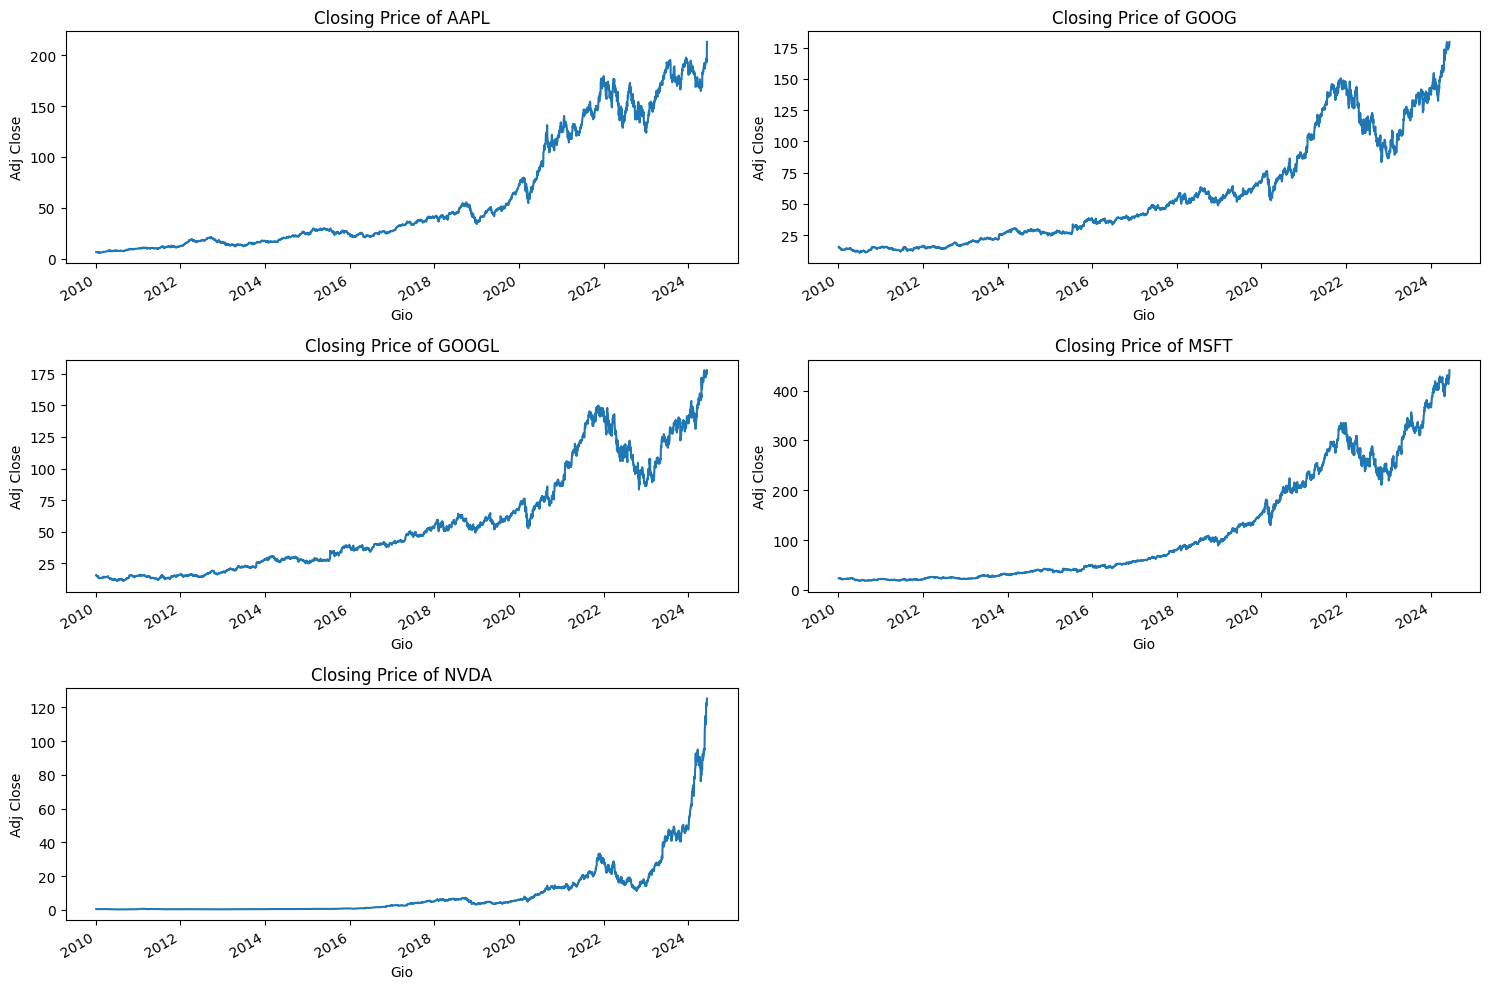

In [11]:
# Let's see a historical view of the closing price
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

best_companies_stocks = df_stocks[df_stocks['Symbol'].isin(best_companies['Symbol'])].groupby('Symbol')

i = 0
for company_symbol, company_stocks in best_companies_stocks:
    company_stocks.set_index('Date', inplace=True)
    i = i + 1
    plt.subplot(3, 2, i)
    company_stocks['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel('Gio')
    plt.title(f"Closing Price of {company_symbol}")

plt.tight_layout()


In [12]:
df_index.head()

,Date,S&P500
0,2014-05-30,1923.57
1,2014-06-02,1924.97
2,2014-06-03,1924.24
3,2014-06-04,1927.88
4,2014-06-05,1940.46


In [13]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527 entries, 0 to 2526
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2527 non-null   datetime64[ns]
 1   S&P500  2527 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.6 KB


In [14]:
# ora serve allineare le date dei valori dell'indice con quelle delle serie storiche dei prezzi delle azioni, visto che non iniziano ad essere raccolte dallo stesso giorno.
# le azioni sono raccolte dal 4 Gennanio 2010, i valori dell'indice dal 30 Maggio 2014, facciamo il drop delle azioni
# precenti a questa data, per il fatto che non si dispone del valore dell'indice per i giorni precedenti ad essa,
# e quindi sarebbe inutile disporre di queste.

# data del primo giorno per cui l'indice è disponibile, la data utile per cui si comincia a tracciare le azioni delle aziende.
primo_giorno = df_index['Date'].min()
primo_giorno

df_stocks = df_stocks[df_stocks['Date'] >= primo_giorno]

# calcolo il numero di anni coperti dal dataset con le sue misurazioni.
ultimo_giorno = df_index['Date'].max()
ultimo_giorno

anni_coperti = (ultimo_giorno - primo_giorno).days / 365
anni_coperti


10.043835616438356

In [15]:
df_stocks.head()  # controllo che ora inizino dal 30 Maggio 2014, come deve essere.

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
1108,2014-05-30,MMM,79.664665,119.188965,119.289299,118.545151,118.821068,4674566.0
1109,2014-06-02,MMM,79.536125,118.996658,119.489967,118.469902,118.954849,2012031.0
1110,2014-06-03,MMM,79.854660,119.473244,119.673912,118.403008,118.795990,2465793.0
1111,2014-06-04,MMM,79.502594,118.946487,119.565216,118.946487,119.489967,1597497.0
1112,2014-06-05,MMM,80.312912,120.158859,120.183945,118.645485,119.364548,1844591.0


### Stampa dei grafici per visualizzare i dati presenti nei vari dataset

Segue breve commento ai grafici.

In [16]:
# grafico sull'andamento dell'indice studiato, una serie temporale.
# The Index Value has shown a consistent upward trend, except for a significant drop in 2020 caused by the COVID-19 pandemic.
import plotly.express as px

fig = px.line(df_index, x=df_index["Date"], y=df_index["S&P500"], title='S&P500 Index Value')

fig.update_xaxes(rangeslider_visible=False,
                 rangeselector=dict(
                     buttons=list([
                         dict(count=6, label="6m", step="month", stepmode="backward"),
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=2, label="2y", step="year", stepmode="backward"),
                         dict(step="all")])),
                 row=1,col=1)


fig.show()

In [17]:
# grafico con la distribuzione delle aziende che compongono l'indice rispetto al settore a cui appartengono.
#The sectors with the highest market capitalization are Technology, Communication Services, and Financial Services. The sectors with the lowest market capitalization are Basic Materials, Utilities, and Real Estate.

df_info_sorted = df_info.sort_values(by=["Marketcap"], ascending=False)

fig = px.bar(
    df_info_sorted,
    x="Sector",
    y="Marketcap",
    barmode="stack",
    labels={'Marketcap by Sector'},
    height=400
)

fig.show()

In [18]:
import plotly.express as px

# relazione tra capitalizzazione di mercato delle aziende e numero di impiegati.
# Most companies have between 0 and 500,000 employees and a market capitalization between 0 and 5 trillion.
df_info_sorted = df_info.sort_values(by=["Marketcap"], ascending=False)

fig = px.scatter(
    df_info_sorted,
    x="Fulltimeemployees",
    y="Marketcap",
    hover_name="Shortname",
    labels={'Marketcap by Sector'},
    height=400
)

fig.show()

In [19]:
# capitalizzazione in funzione delle città.
# If we group the companies by city, the ones with the largest market capitalization are Mountain View, Santa Clara, and Redmond.
df_info_sorted = df_info.sort_values(by=["Marketcap"], ascending=False)

fig = px.bar(
    df_info_sorted,
    x="City",
    y="Marketcap",
    barmode="stack",
    labels={'Marketcap by Sector'},
    height=400
)

fig.show()

### Osservazioni
* The S&P 500 Index has been consistently increasing in value since 1984, making it a relatively safe investment.
* Its value is heavily influenced by the Technology sector.
* The top three companies by market capitalization are from the Technology sector (Microsoft, Apple, and Nvidia), followed by those from Consumer Cyclical and Communication Services (Google, Amazon, and Meta).

In [20]:
# prime 10 aziende dell'indice per capitalizzazione
df_info = df_info.sort_values(by='Marketcap', ascending = False)
df_info.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,441.06,3278094467072,1.259820e+11,0.170,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.064747
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,213.07,3267236724736,1.296290e+11,-0.043,Cupertino,CA,United States,150000.0,"Apple Inc. designs, manufactures, and markets ...",0.064532
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,125.20,3079707295744,4.927500e+10,2.621,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.060828
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,179.56,2208336707584,1.097230e+11,0.154,Mountain View,CA,United States,180895.0,Alphabet Inc. offers various products and plat...,0.043618
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,177.79,2206000480256,1.097230e+11,0.154,Mountain View,CA,United States,180895.0,Alphabet Inc. offers various products and plat...,0.043571


## Generazione report e indagine dei dati
Riassunto: sono stati generati report sui dati e sono state riscontrate anomalie tipiche del dominio:
*   Missing values: in quanto aziende entrate recentemente non erano ancora quotate, e quindi i dati per queste risultano mancanti.
*  Alta correlazione tra colonne: tipiche del dominio, es ebitda (margine operativo lordo) correlato con numero di impiegati.

Nessuna vera anomalia riscontrata.

Saltare direttamente a punto di sommario successivo.



In [21]:
# sviluppo dei report su questi dataframe, per vedere se ci sono anomalie.
info_profile = ProfileReport(df_info, title = "Stocks report", explorative=True)
index_profile = ProfileReport(df_index, title = "Stocks report", explorative=True)
stocks_profile = ProfileReport(df_stocks, title = "Stocks report", explorative=True)

In [22]:
info_profile
# da questo report notiamo una percentuale di missing values del 5% circa per i campi Ebitda e State.
# altri alerts significativi non sono stati individuati, ci sono solo correlazioni e valori sbilanciati, ma sono tipici del dominio.

In [23]:
index_profile
# dall'analisi di questo set non sono state rilevate anomalie.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
stocks_profile
# da tale report, un primo alert individuato è la presenza di correlazioni tra le colonne sopra riportate, ma queste sono normali all'interno del dominio analizzato.

# inoltre, è stata riscontrata una percentuale di missing values per diverse colonne relative ai prezzi delle azioni, intorno al 3%.
# risulta un'anomalia da approfondire, in quanto si deve disporre dei prezzi delle azioni per poter predire l'indice.
# bisogna capire come sono distribuiti i missing values e vedere come questi possono compromettere le previsioni.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
# si osserva nello specfico che i missing values, relativi alle diverse colonne dove sono presenti (Adj Close,Close,High,Low,Open,Volume), sono conteggiati in uguale numero.
# questo lascia supporre che quando il valore del prezzo è mancante per una colonna tra Adj Close, Close, High, Low, Open e Volume, lo è anche per le altre.

print('numero di righe con missing value nella colonna "Adj Close": ', df_stocks[df_stocks['Adj Close'].isnull()].shape[0])
print('numero di righe con missing value nella colonna "Close": ', df_stocks[df_stocks['Close'].isnull()].shape[0])
print('numero di righe con missing value nella colonna "High": ', df_stocks[df_stocks['High'].isnull()].shape[0])
print('numero di righe con missing value nella colonna "Low": ', df_stocks[df_stocks['Low'].isnull()].shape[0])
print('numero di righe con missing value nella colonna "Open": ', df_stocks[df_stocks['Open'].isnull()].shape[0])
print('numero di righe con missing value nella colonna "Volume": ', df_stocks[df_stocks['Volume'].isnull()].shape[0])

In [ ]:
# andando nel dataset e selezionando le righe con missing values per una di queste colonne, si nota la presenza di missing values anche per le restanti.
multiple_null_rows = df_stocks[df_stocks['Adj Close'].isnull() & df_stocks['Close'].isnull() & df_stocks['High'].isnull() & df_stocks['Low'].isnull() & df_stocks['Open'].isnull() & df_stocks['Volume'].isnull()]
print('numero di righe con missing value su tutte le colonne dei prezzi: ', multiple_null_rows.shape[0])

# deduco che tali righe con valori assenti su più colonne sono in numero pari al numero di righe con un missig value su una singola di queste colonne.
# per tanto ho che ogni riga con almeno un missing value ha in realtà tutte le colonne dei prezzi nulle.
# quindi ho righe nulle uniformi tra loro; ovvero tutte queste righe con almeno un valore mancante, hanno le stesse colonne con valori mancanti.

null_rows = multiple_null_rows   # righe con un valore nullo in almeno una colonna.
null_rows

In [ ]:
# dobbiamo ora identificare come queste righe con prezzi mancanti siano distribuite tra le diverse aziende considerate.
# ovvero se sono tutte righe mancanti per un'azienda, o per diverse aziende, magari con più righe nulle per un'azienda piuttosto che un'altra;
# e se riguardano giorni consecutivi o meno.

# guardando le righe con missing values su più colonne si nota che il simbolo dell'azione associato a ciascuna riga è ricorrente,
# e interessa giorni consecutivi tra loro.

# suppongo quindi che le righe con missing values riguardino intervalli di tempo e non singoli giorni sparsi,
# e che siano associate a una stessa azienda e non che ci siano righe nulle indipendentemente dall'azienda a cui sono associate.

# raggruppo queste righe con valori nulli rispetto all'azienda a cui si riferiscono.
# quindi conto quante righe nulle ho per ciascuna azienda. Conto rispetto al numero di date diverse associate ad ogni riga,
# in quanto così conto il numero di righe nulle per ogni azienda, avendo il campo Date unico per ogni riga all'interno di ciascuna azienda.
# infatti ad ogni giorno è associata una quotazione differente, e non posso avere più quotazione nello stesso giorno per la stessa azienda.
# nota: conto le giornate per contare le righe, perchè ho una giornata distinta per ogni riga.

null_rows_by_company = null_rows.groupby('Symbol')
count_of_null_row_by_company = null_rows_by_company['Date'].count()
count_of_null_row_by_company


In [ ]:
print("Numero di aziende con dati mancanti: ", null_rows_by_company.ngroups)
# noto che il totale di aziende per cui ho dei missing values è 35. Quindi rispetto al totale delle aziende esaminate, 503, sono
# comunque una percentuale contenuta, meno del 7%.
# quindi per il task di predizione dell'indice queste sono in numero limitato, e statisticamente non significativo.

print("\nNumero massimo di anni mancanti nella singola azienda, tra le diverse aziende:", count_of_null_row_by_company.max() / 365)
print("\nNumero medio di anni mancanti per singola azienda: ", null_rows_by_company.size().mean() / 365)  # calcolo la media del numero di righe mancanti rispetto ad ogni azienda, quindi divido per 365 per sapere quanti hanni non sono coperti da dati, complessivamente.

# per una singola azienda possono mancare fino a 7 anni di dati, oltre il 50%. Molto elevato.
# in media tra queste aziende mancano circa 2.6 anni di dati, per cui non si dispone delle quotazioni giornaliere.
# sul totale dei 10 anni coperti dal dataset non sono pochi, ma riprendendo la considerazione di prima, per cui ho un numero contenuto di aziende con missing value,
# il problema che queste possono causare rimane limitato per il task di predizione.

In [ ]:
# raggruppando per simbolo, quindi per azienda, e contando per ciascuna di esse le righe con prezzi mancanti,
# noto che le aziende, per cui non si dispone di alcuni loro prezzi, hanno un numero di righe nulle differenti tra loro,
# quindi per singola azienda posso avere meno dati rispetto a quelli disponibili per un'altra.

# inoltre noto che per alcune di queste ho molte righe nulle, che comporta non coprire molti anni rispetto a quelli previsti dal dataset, 10 anni;
# queste sono poco utili ai fine delle predizioni.
# è opportuno non includere queste nel dataset da usare sui modelli, dato che hanno troppi missing value associati,
# e ricostruirli non è possibile, e includere solo gli anni disponibili è poco utile hai fini della predizione.

# colleziono le aziende da rimuovere perché penso abbiano troppi missing values per il dataset che sto formando.
# coprendo col dataset un periodo di 10 anni, rimuovo le aziende per cui non si dispone di un totale di dati superiore a 1 anno,
# tenendo per buona una tolleranza del 10%. Quindi scarto le aziende con un numero superiore a 365 righe nulle.

company_to_remove = list(count_of_null_row_by_company[count_of_null_row_by_company > 365].keys())
print('aziende rimosse perché hanno troppi pochi dati: ', company_to_remove)
print('numero di aziende scarte: ', len(company_to_remove))

df_stocks_refined = df_stocks[~df_stocks['Symbol'].isin(company_to_remove)]

# per le restanti abbiamo un totale di al più 1 anno mancante sui 10 anni coperti dal dataset, queste lacune sono limitate e quindi è tecnicamente possibile
# includere queste aziende nel dataset anche se presentano dei missing values.

In [ ]:
# isolando come già fatto le righe con valori nulli dal dataset, ora si osserva che le aziende rimaste sono con un numero di righe con missing values limitato.
# quelle con troppe righe nulle sono state rimosse dal dataset.

multiple_null_rows = df_stocks_refined[df_stocks_refined['Adj Close'].isnull() & df_stocks_refined['Close'].isnull() & df_stocks_refined['High'].isnull() & df_stocks_refined['Low'].isnull() & df_stocks_refined['Open'].isnull() & df_stocks_refined['Volume'].isnull()]
multiple_null_rows

null_rows = multiple_null_rows

null_rows_by_company = null_rows.groupby('Symbol')
count_of_null_row_by_company = null_rows_by_company['Date'].count()
count_of_null_row_by_company

In [ ]:
# ora resta da vedere la distribuzione delle righe con missing values rispetto all'ordine temporale.
# se tutte le quotazioni mancanti di un'azienda sono consecutive tra loro, allora non è possibile ricostruirne il valore dell'azione, e serve scartare
# l'intera sequenza delle quotazioni per quell'azienda.
# se invece ho un numero limitato di quotazioni mancanti consecutive tra loro, si è in grado di ricostruire un andamento plausibile del prezzo durante ognuna
# di queste sequenze ignote, e si può usare questa sequenza di prezzi ricostruita insieme a quella effettiva dispobile in maniera efficace nel task di predizione.

# disponendo delle righe con quotazioni nulle già nell'ordine temporale e raggruppate per ogni azienda,
# valuto se le date di una riga con la successiva sono giorni consecutivi o meno.

# quindi valuto per quanti giorni consecutivi mi mancano i dati;
# in base a questo numero valuto se conviene ricostruire la sequenza o scartare l'intera azienda, perchè una sequenza di giorni consecutivi troppo
# lunga non risulta ricostruibile, e usare una serie temporale di prezzi con le lacune non risulta efficace per le predizioni.

max_num_of_consecutive_null_days_by_company = {}

# confronto righe consecutive, se la differenza tra date è di un giorno per più righe consecutive, allora incremento il conteggio
# così vedo il numero massimo di giorni consecetivi per cui mancano i dati. Faccio questo conteggio per ogni azienda con righe nulle.

for name, null_rows_in_company in null_rows_by_company:
  current_num_of_consecutive_days = 0
  max_num_of_consecutive_null_days_by_company[name] = 0

  diff_between_date_in_company = null_rows_in_company['Date'].diff()
  #print(diff_between_date_in_company)
  for _, diff in diff_between_date_in_company.items():
    if diff.days != 1:
      current_num_of_consecutive_days = 0
    else:
      current_num_of_consecutive_days = current_num_of_consecutive_days + 1

      if max_num_of_consecutive_null_days_by_company[name] < current_num_of_consecutive_days:
        max_num_of_consecutive_null_days_by_company[name] = current_num_of_consecutive_days

max_num_of_consecutive_null_days_by_company

# notiamo che al massimo ci sono 4 giorni di distanza che separano ogni riga con valori nulli dalla successiva, nella sequenza dei prezzi per una singola azienda.
# questo è un comportamento strano, dato che il periodo coperto dal dataset è di 10 anni, e dato che ho un numero diverso di date con valori nulli per azienda,
# immaginavo che la distribuzione dei giorni con valori mancanti sul periodo complessivo del dataset fosse uniforme, ovvero avessi una distanza maggiore tra righe
# di una stessa azienda che sia dotata di un numero ridotto di righe nulle. Al contrario riscontro che, a prescindere dal numero di date senza prezzi che ogni azienda
# ha associato, ho questo sono sempre relativamente concentrate in un periodo di tempo ristretto, non avendo più di 4 gg che separano una data nulla dalla successiva.

# questo suggerisce un pattern nella mancanza di dati non conforme ad una distribuzione casuale delle date mancanti, (che in realtà è la più indicata essendo quella associata al rumore),
# dato che queste risultano sempre concentrate su un periodo di tempo ristretto, e al contrario non sono sparse su tutti i 10 anni in maniera casuale.

In [ ]:
# a conferma di tale anomala distribuzione si fa lo stesso calcolo anche sulle aziende con molte più righe nulle, quelle che sono state scartate.
multiple_null_rows = df_stocks[df_stocks['Adj Close'].isnull() & df_stocks['Close'].isnull() & df_stocks['High'].isnull() & df_stocks['Low'].isnull() & df_stocks['Open'].isnull() & df_stocks['Volume'].isnull()]
multiple_null_rows

null_rows = multiple_null_rows

null_rows_by_company = null_rows.groupby('Symbol')

for name, null_rows_in_company in null_rows_by_company:
  current_num_of_consecutive_days = 0
  max_num_of_consecutive_null_days_by_company[name] = 0

  diff_between_date_in_company = null_rows_in_company['Date'].diff()
  #print(diff_between_date_in_company)
  for _, diff in diff_between_date_in_company.items():
    if diff.days != 1:
      current_num_of_consecutive_days = 0
    else:
      current_num_of_consecutive_days = current_num_of_consecutive_days + 1

      if max_num_of_consecutive_null_days_by_company[name] < current_num_of_consecutive_days:
        max_num_of_consecutive_null_days_by_company[name] = current_num_of_consecutive_days

max_num_of_consecutive_null_days_by_company

# notiamo la stessa distribuzione delle righe anche per le aziende con molti meno valori disponibili.


# su suggerimento di questa osservazione, andando a vedere manualmente le righe nulle di alcune di queste aziende è possibile concludere che
# le righe nulle di ciascuna azienda, quando presenti, sono tutte contigue tra loro nel dataset originario di partenza, il quale è già ordinato temporalmente.
# grazie a questa osservazione si scopre che le diverse righe dei prezzi, sia quando sono presenti che mancanti, possono coprire registrazioni dei prezzi anche per
# giorni non successivi nel calendario; per il fatto che la borsa rimanga in generale chiusa il weekend e durante le festività.

# quindi, rispetto ai giorni in cui la borsa è effettivamente aperto, per le aziende di cui non si dispongono di alcuni dati,
# ho che la loro mancanza riguarda giorni uno consecutivo al altro.
# inoltre, sempre osservando manualmente il dataset per alcune aziende, ho che questi giorni riguardano, rispetto ad ogni azienda, un periodo di tempo che parte sempre
# dall'inizio della datazione del dataset fino ad un certo giorno per cui oltre tale giorno si dispongono di tutte le quotazione.

# questo non è dovuto al fatto che alcuni dati siano stati persi o non registrati, ma al fatto che tali aziende ancora non fosse state ancora fondate o quotate o inserite nell'indice
# prima della prima data iniziale del dataset.
# per queste aziende, si dispone quindi di tutti i dati che è possibile avere per esse, in quanto ad una data precedente a quella della loro ultima riga nulla esse ancora
# non erano registrate, e quindi non è possibile disporre di alcun dato prima di quel momento.


# in conclusione alcuni valori dei prezzi per certe aziende non sono disponibili precedentemente ad una certa data all'interno del dataset.
# e non è possibile e nemmeno logico ricostruire tali valori, in quanto non sono valori persi ma inesistenti dal punto di vista del dominio analizzato.

In [ ]:
# per quanto analizzato nel punti precedenti, potremmo valutare di escludere tutte queste aziende il cui periodo di registrazione nel dataset è successivo
# alla prima data coperta dal dataset e dalla maggior delle aziende che compongono il titolo.

# questo perché come già osservato tali aziende sono in numero contenuto sul totale di quelle del dataset, quindi rimuoverle non comportano una grande alterazione a livello statistico.
# inoltre rimuovendo aziende inserite recentemente si rinuncia ad una porzione di dati limitata, riguardante appunto solo una % di tutti gli anni coperti dal dataset;
# quindi questa rimozione non limita il potere predittivo.

# abbiamo però che combinando le diverse feauters associate alle diverse aziende attraverso una media ponderata,
# è possibile calcolare tale media delle feauters includendo, giorno per giorno, un numero di aziende diverso, a seconda della disponibilità dei dati delle aziende e quindi delle
# features che è possibile calcolare.
# per tanto, per come sono usati i dati e le features, ovvero in maniera combinata, avere anche una disponibilità dei prezzi delle azioni non uniforme nel tempo non
# risulta un problema. Quindi si decide di lasciare nel dataset queste aziende il cui periodo di registrazione è successivo alla prima data coperta dal dataset.

#company_to_remove = list(count_of_null_row_by_company[count_of_null_row_by_company > 0].keys())

# eventuale rimozione dal dataset delle aziende i cui dati non partono dalla prima data del dataset.
#df_stocks = df_stocks[~df_stocks['Symbol'].isin(company_to_remove)]

In [ ]:
df_stocks

# **Features engineering**

## Descrizione del processo di sintesi delle features:
1.   Per ciascuna delle 500 aziende che compongo l'indice azionario, abbiamo una serie storica delle loro quotazioni in borsa, giorno per giorno, dal 2014 ad oggi.
 Nel dettaglio abbiamo il valore dei prezzi delle loro azioni alla chiusura, colonna Close.

 Di queste quotazioni vengono calcolati diversi *indicatori statistici tipici del settore finanziario*, al fine di predirne l'andamento e le opportunità di investimento.

 Vengono calcolati gli stessi indicatori statistici per i diversi andamenti delle azioni di tutte le 500 aziende prese in esame.

2. Successivamente, si è notato che il numero di features generato era troppo elavato per essere gestibile, 30 feauters * 500 aziende.
Per tanto i medesimi indicatori statistici di ciascuna azienda sono stati combinati insieme tramite una media pesata rispetto alla capitalizzazione associata a ciascuna azienda; riducendo il numero di features al numero di indicatori statistici calcolati per ogni azienda.

Specifiche degli indicatori statistici considerati:

Nota: questi indicatori sono calcolati su diverse finestre temporali rispetto al valore corrente della giornata/istanza considerata.
Tutti sono calcolati prendendo come dati le quotazioni alla chiusura.

* Volatility su un periodo di 10 e 20 gg
* EMA su 10, 20, 50, 200 gg
* MOM su 1, 2 e 3 gg
* RSI
* ROC su 5, 10, 15, 20 gg
* %K su 14 gg
* %D su 3 gg
* MACD
* A/D

Inoltre alcuni dati grezzi sono stati utilizzati come features stesse, insieme a quelle sintetizzate sopra:

*  **Date**, che è stata inizialmente convertita da data a giorno della settimana, il quale è stato poi discretizzato ad intero, per meglio essere gestito dai modelli. Abbiamo infatti che una data non è da usare come feature dei modelli per ml; suggerirebbe un numero progressivo che risulta ingannevole e non costruttivo. Per quanto riguarda la conversione a intero, tale scelta è giustificata dal fatto che un input categoriale o testuale come il giorno della settimana, risulta più efficiente a livello computazionale per essere gestito, inoltre essendo ora un input numerico e non più strettamente categoriale o testuale esso risulta compatibile con alcuni modelli, come NN e SVM, cosa che nella forma originale non gli era permesso.
* **Volume**, già presente nel dataset originale.
* **Close**, già presente nel dataset originale.

**Stabilità e Convergenza**: in generale, i modelli di machine learning spesso convergono più rapidamente e stabilmente quando le features sono su scale simili. Per tanto si è applicato uno standard scaler su di esse per favorire tale fenomeno. Ad esclusione della featuers Date, che è rimasta inalterata. In quanto applicare una standardizzazione su una features categoriale non ha senso logico, in quanto tra giorni non sussiste una relazione aritmetica e i valori standardizzati ottenuti, come 1.2, non hanno un vero significato rispetto ai giorni indicati con 1, 2, ...


## **Creazione della features classe**
Come ultimo punto abbiamo sintetizzato la features classe.
Si tratta di un singolo valore binario, associato alle istanze da classificare, e rappresenta la presenza o meno di condizioni di mercato favorevoli per gli investimenti nell'indice.

Viene creato attraverso la **strategia della tripla barriera**, la quale coinvolge l'uso di tre limiti per classificare i trade: una barriera superiore (profit target), una barriera inferiore (stop loss) e un limite temporale (time limit).

In questo caso, utilizzeremo il doppio della volatilità giornaliera calcolata come deviazione standard dei rendimenti logaritmici per definire le barriere superiore e inferiore, e imposteremo un limite temporale di 10 giorni.

* In primis, attraverso tale strategia, si è aggiunto la colonna trade_outcome che classifica i trade come profittevoli (1), non profittevoli (-1) o neutri (0), cioè ho superato il limite di 10 giorni.

* Successivamente si è aggiunta una nuova colonna trade_profitable che è 1 se il trade_outcome è 1 (profittevole) e 0 altrimenti, per ottenere un effettivo valore binario.


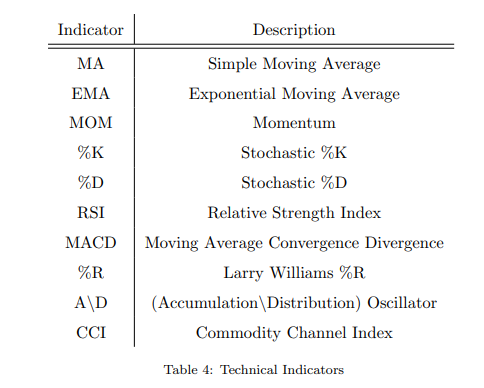

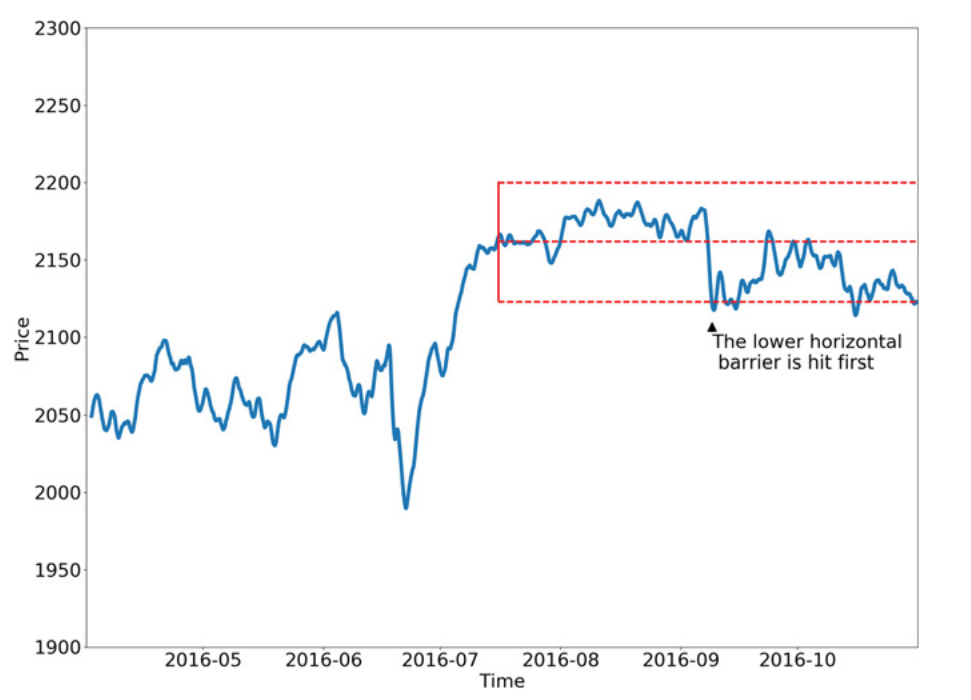

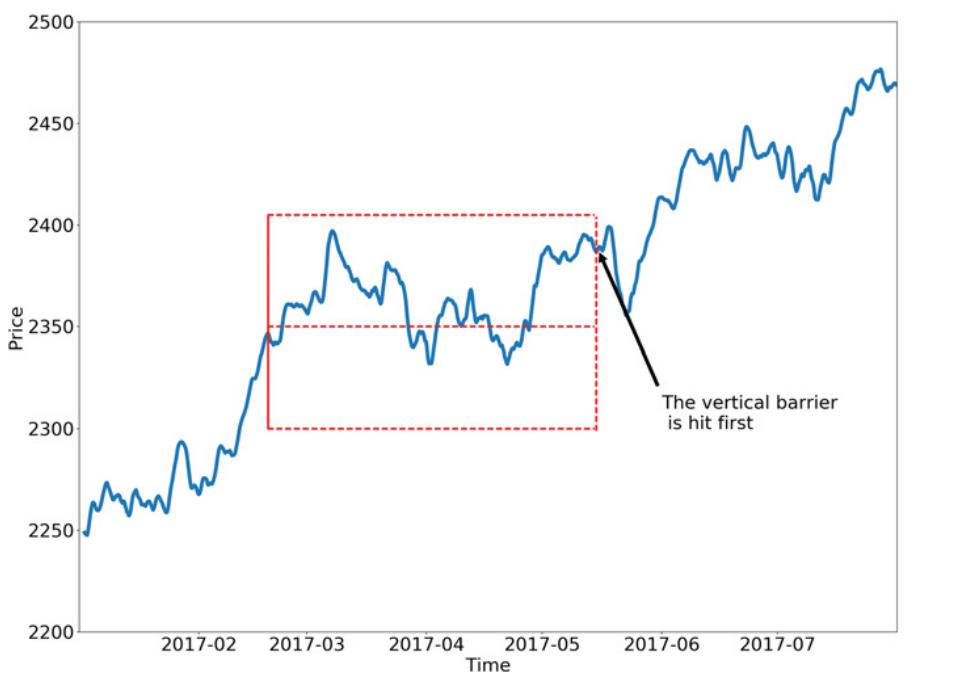

Successivamente a tale costruzione delle features, le istanze risultanti sono state ripartite in tre distinti *dataset*, con le seguenti ripartizioni:
* Training Set: 70%
* Validation Set: 15%
* Testing Set: 15%

Ciascuno dimensionato come segue:
* Dimensioni Training set: 1503 samples
* Dimensioni Validation set: 501 samples
* Dimensioni Test set: 502 samples

La *ripartizione delle singole istanze* tra un dataset e l'altro è stata fatta con *split randomici*, applicando una stratificazione sulla features classe, in modo da garantire una equa distribuzione di istanze di tipo diverso tra i vari dataset.

Il dataset di training è comune a tutti i modelli costruiti, in modo da garantire un equo addestramento tra i modelli al fine di permettere un altrettando equo confronto di prestazioni.

Il dataset di validation è stato impiegato tra i diversi modelli per valutarne le prestazioni in maniera individuale, e per escludere la presenza di overfitting e problematiche analoghe.

Infine il dataset di test è stato utilizzato per comparare tra loro i modelli più prestanti individuati nelle precedenti prove.

Saltare a punto successivo del sommario.

In [ ]:
# procediamo ora con la costruzione delle features del dataset, quelle che verranno usate dai modelli per predire la classe.
# per il calcolo dei diversi indicatori tecnici usiamo il valore dei prezzi delle azioni alla chiusura, colonna Close.

# di ogni azienda e dell'indice, calcoliamo le seguenti features:
# Date, il giorno della settimana,
# Volume, già presente nel dataset originale,
# Close, già presente nel dataset originale,
# Volatility su un periodo di 10 e 20 gg, del prezzo alla chiusura,
# SMA su 20 gg,
# EMA su 10, 20, 50, 200 gg
# MOM su 1, 2 e 3 gg
# RSI
# ROC su 5, 10, 15, 20 gg
# %K su 14 gg
# %D su 3 gg
# MACD
# A/D
# individuazione di eventi col il metodo della tripla barriera per le singole aziende

# poi la classe con il metodo della tripla barriera.


# creo colonna Day of week, per indicare il giorno della settimana.
df_stocks['Day_of_week'] = df_stocks['Date'].dt.day_of_week

# rimuovo colonne non usate dal dataset originario.
df_stocks = df_stocks.drop(columns=['Adj Close', 'Open'])

# nota: nel calcolo di ciascuna features nel df_stocks, raggruppo ogni volta per simbolo, così calcolo per ciascuna azienda le diverse features.
# per il calcolo delle features nel df_index, rinomino la colonna S&P500 in Close, così posso riusare il codice impiegato con df_stocks anche su df_index

df_index = df_index.rename(columns={"S&P500":"Close"})

In [ ]:
df_index

In [ ]:
df_stocks.head()

In [ ]:
# calcolo della Volatility
# Il codice ordina i dati per data, calcola i rendimenti logaritmici giornalieri,
# e quindi calcola la deviazione standard di questi rendimenti su finestre mobili di 10 e 20 giorni per ottenere la volatilità.

# Funzione per calcolare la volatilità giornaliera su finestre mobili specificate
def calculate_volatility(group, periods=[10, 20]):
    group['log_return'] = np.log(group['Close'] / group['Close'].shift(1))
    for period in periods:
        col_name = f'Volatility_{period}'
        group[col_name] = group['log_return'].rolling(window=period).std()

    # Rimuovere le colonne intermedie non necessarie
    group = group.drop(columns=['log_return'])

    return group

# Calcola la volatilità per ogni gruppo
periods = [10, 20]
df_stocks = df_stocks.groupby('Symbol', group_keys=False).apply(lambda group: calculate_volatility(group, periods=periods))

df_index = calculate_volatility(df_index, periods=periods)

In [ ]:
df_index

In [ ]:
# calcolo della simple moving average su un periodo di 20 giorni
def calculate_sma(group):
    group['SMA_20'] = group['Close'].rolling(window=20).mean()
    return group

# Applica la funzione a ciascun gruppo
df_stocks = df_stocks.groupby('Symbol', group_keys=False).apply(calculate_sma)


In [ ]:
# calcolo di EMA, su un periodo di 10, 20, 50 e 200 giorni.
# calcolo della Media Mobile Esponenziale (EMA) su periodi di 10, 20, 50 e 200 giorni,
# possiamo parametrizzare la funzione di calcolo EMA e applicarla a ciascun gruppo. Ecco il codice Python che esegue questi passaggi:

# Funzione parametrizzata per calcolare l'EMA
def calculate_ema(group, period):
    ema_column = f'EMA_{period}'
    group[ema_column] = group['Close'].ewm(span=period, adjust=False).mean()
    return group

# Lista dei periodi per cui calcolare l'EMA
ema_periods = [10, 20, 50, 200]

# Applica la funzione EMA a ciascun gruppo per ogni periodo
for period in ema_periods:
    df_stocks = df_stocks.groupby('Symbol', group_keys=False).apply(lambda group: calculate_ema(group, period))

In [ ]:
# calcolo di MOM, su un periodo di 1, 2 e 3 giorni.

# Funzione parametrizzata per calcolare il MOM
def calculate_mom(group, period):
    mom_column = f'MOM_{period}'
    group[mom_column] = group['Close'].diff(period)
    return group

# Lista dei periodi per cui calcolare il MOM
mom_periods = [1, 2, 3]

# Applica la funzione MOM a ciascun gruppo per ogni periodo
for period in mom_periods:
    df_stocks = df_stocks.groupby('Symbol', group_keys=False).apply(lambda group: calculate_mom(group, period))

In [ ]:
# calcolo di RSI.
# l'indice di forza relativa (RSI) su un periodo di 14 giorni

# Funzione per calcolare l'RSI
def calculate_rsi(group, period=14):
    delta = group['Close'].diff(1)

    gain = (delta.where(delta > 0, 0)).ewm(span=period, adjust=False).mean()
    loss = (-delta.where(delta < 0, 0)).ewm(span=period, adjust=False).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    group['RSI_14'] = rsi
    return group

# Applica la funzione RSI a ciascun gruppo
df_stocks = df_stocks.groupby('Symbol', group_keys=False).apply(calculate_rsi)

In [ ]:
# ROC SU 5, 10, 15, 20 giorni

# Funzione parametrizzata per calcolare il ROC
def calculate_roc(group, period):
    roc_column = f'ROC_{period}'
    group[roc_column] = group['Close'].pct_change(periods=period) * 100
    return group

# Applica la funzione ROC a ciascun gruppo per ogni periodo
roc_periods = [5, 10, 15, 20]

for period in roc_periods:
    df_stocks = df_stocks.groupby('Symbol', group_keys=False).apply(lambda group: calculate_roc(group, period))


In [ ]:
# calcolo degli oscillatori stocastici %K su 14 gg, il Williams %R su 14 gg, e %D su 3 gg.

# Funzione per calcolare il Stochastic Oscillator %K
def calculate_stochastic_k(group, period=14):
    group['L14'] = group['Low'].rolling(window=period).min()
    group['H14'] = group['High'].rolling(window=period).max()

    group['%K'] = 100 * ((group['Close'] - group['L14']) / (group['H14'] - group['L14']))
    group['%R'] = -100 * ((group['H14'] - group['Close']) / (group['H14'] - group['L14']))

    # Rimuovere le colonne intermedie non necessarie
    group = group.drop(columns=['L14', 'H14'])

    return group

# Funzione per calcolare il Stochastic Oscillator %D
def calculate_stochastic_d(group, k_period=14, d_period=3):
    group = calculate_stochastic_k(group, k_period)
    group['%D'] = group['%K'].rolling(window=d_period).mean()
    return group

# Applica la funzione %D a ciascun gruppo
df_stocks = df_stocks.groupby('Symbol', group_keys=False).apply(lambda group: calculate_stochastic_d(group, k_period=14, d_period=3))

In [ ]:
# calcolo di MACD nella configurazione di base
# Funzione per calcolare il MACD, e signal line che è quello che si usa per interpretare MACD
def calculate_macd(group, short_period=12, long_period=26, signal_period=9):
    group['EMA_12'] = group['Close'].ewm(span=short_period, adjust=False).mean()
    group['EMA_26'] = group['Close'].ewm(span=long_period, adjust=False).mean()
    group['MACD'] = group['EMA_12'] - group['EMA_26']
    group['Signal_Line'] = group['MACD'].ewm(span=signal_period, adjust=False).mean()

    # Rimuovere le colonne intermedie non necessarie
    group = group.drop(columns=['EMA_12', 'EMA_26'])

    return group

# Applica la funzione MACD a ciascun gruppo
df_stocks = df_stocks.groupby('Symbol', group_keys=False).apply(lambda group: calculate_macd(group, short_period=12, long_period=26, signal_period=9))

In [ ]:
# calcolo dell'indicatore Accumulation/Distribution (A/D), è giornaliero.

# Funzione per calcolare l'indicatore Accumulation/Distribution (A/D)
def calculate_ad(group):
    group['MFM'] = ((group['Close'] - group['Low']) - (group['High'] - group['Close'])) / (group['High'] - group['Low'])
    group['MFV'] = group['MFM'] * group['Volume']
    group['A/D'] = group['MFV'].cumsum()

    # Rimuovere le colonne intermedie non necessarie
    group = group.drop(columns=['MFM', 'MFV'])

    return group

# Applica la funzione A/D a ciascun gruppo
df_stocks = df_stocks.groupby('Symbol', group_keys=False).apply(calculate_ad).reset_index(drop=True)


In [ ]:
# Commodity Channel Index (CCI) su un periodo di 20 giorni

# Funzione per calcolare la deviazione media
def mean_deviation(series):
    mean = series.mean()
    return abs(series - mean).mean()

# Funzione per calcolare il CCI
def calculate_cci(group, period=20):
    group['TP'] = (group['High'] + group['Low'] + group['Close']) / 3
    group['SMA_TP'] = group['TP'].rolling(window=period).mean()
    group['MD'] = group['TP'].rolling(window=period).apply(mean_deviation, raw=True) # raw=True è per migliorare le prestazioni.
    group['CCI'] = (group['TP'] - group['SMA_TP']) / (0.015 * group['MD'])

    # Rimuovere le colonne intermedie non necessarie
    group = group.drop(columns=['TP', 'SMA_TP', 'MD'])

    return group

# Applica la funzione CCI a ciascun gruppo
df_stocks = df_stocks.groupby('Symbol', group_keys=False).apply(calculate_cci)

In [ ]:
# La strategia della tripla barriera coinvolge l'uso di tre limiti per classificare i trade: una barriera superiore (profit target),
# una barriera inferiore (stop loss) e un limite temporale (time limit).
# In questo caso, utilizzeremo due volte la volatilità giornaliera calcolata come deviazione standard dei rendimenti logaritmici per definire le barriere superiore e inferiore
# e imposteremo un limite temporale di 10 giorni.

# quello che si fa in questo blocco è
# Aggiungere la colonna trade_outcome che classifica i trade come profittevoli (1), non profittevoli (-1) o neutri (0), cioè ho superato il limite di 10 giorni.
# Aggiunge una nuova colonna trade_profitable che è 1 se il trade_outcome è 1 (profittevole) e 0 altrimenti.
# Applichiamo la funzione calculate_volatility e apply_triple_barrier a ciascun gruppo di simboli nel DataFrame raggruppato.


# Calcolare la volatilità giornaliera su una finestra mobile di 10 giorni.
# Definire le barriere superiore e inferiore utilizzando due volte la volatilità.
# Classificare i trade in base al raggiungimento delle barriere o del limite temporale.


# Funzione per applicare il metodo della tripla barriera utilizzando solo la volatilità a 10 giorni
def apply_triple_barrier(group, volatility_col='Volatility_10', volatility_factor=2, max_days=10):
    group = group.sort_values('Date').copy()
    group[volatility_col] = group[volatility_col].shift(1)  # Shift to avoid using current day volatility

    # Initialize columns for barrier prices and outcomes
    group['upper_barrier'] = group['Close'] + volatility_factor * group[volatility_col] * group['Close']
    group['lower_barrier'] = group['Close'] - volatility_factor * group[volatility_col] * group['Close']
    group['time_limit'] = group['Date'].shift(-max_days)

    def classify_trade(row):
        for i in range(1, max_days + 1):
            if (row.name + i) < len(group):
                future_row = group.iloc[row.name + i]
                if future_row['Close'] >= row['upper_barrier']:
                    return 1  # Profit
                elif future_row['Close'] <= row['lower_barrier']:
                    return -1  # Loss
        return 0  # Neutral

    group['Trade_outcome'] = group.apply(classify_trade, axis=1)
    group['Trade_profitable'] = (group['Trade_outcome'] == 1).astype(int)

    # Rimuovere le colonne intermedie non necessarie
    group = group.drop(columns=['upper_barrier', 'lower_barrier', 'time_limit'])

    return group

In [ ]:
# calcolo l'ultima feature, la classe, attraverso il metodo della tripla barriera applicato all'indice

df_index = apply_triple_barrier(df_index, volatility_col='Volatility_10', volatility_factor=2, max_days=10)

In [ ]:
df_index = df_index.rename(columns={'Trade_profitable': 'S&P500_trade_profitable'})


In [ ]:
# rimuovo colonne High e Low delle stocks, non mi servono più per il calcolo di nuove features e non le uso come features.
df_stocks = df_stocks.drop(columns=['High', 'Low'])


In [ ]:
# rimuovo le righe dal dataset che hanno dei missing values in alcuni indicatori statistici;
# abbiamo che alcuni indicatori statistici sono nulli per i primi x giorni, dato che questi hanno bisogno, per essere calcolati, di x-1 giorni
# precedenti al giorno corrente per cui si sta calcolando l'indicatore. Ma per i primi x giorni questo non è possibile farlo.
# essendo dei missing values posso pensare di provare a ricostruirli, ma non ho i dati per farlo, altrimenti avrei calcolato l'indicatore.
# quindi decido di togliere questi records dal dataset.

df_stocks = df_stocks.dropna()

In [ ]:
# noto che ho un totale di 30 indicatori statistici computati per le quotazioni azionarie di ciascuna azienda del dataset.
# valutando quindi come una features distinta ciascun indicatore statistico di ciascuna azienda esaminata ho un totale di più di 15000 features.
# decisamente troppe. Serve ridurne il numero con una tecnica che le combini insieme.

# l'approccio usato:
#  aggrego insieme i diversi valori di un indicatore statistico utilizzando una media ponderata rispetto al market cap delle aziende è un buon approccio.
# Questo metodo assegna un peso maggiore agli indicatori delle aziende con un market cap maggiore, riflettendo la loro importanza relativa all'interno dell'indice.

# con questaa aggregazione ho che le features totali risultano ora pari al numero di indicatori statistici e in generale le colonne associate a ciascuna azienda, quindi 30.
# abbiamo invece che il numero di record rimane costante, pari cioè al numero di giorni delle quotazioni coperte dal dataset, circa 2500 per ogni azienda, dato che il dataset
# contiene circa 10 anni di dati. Ho tanti record/giorni quanti quelli con la borsa aperta in questo intervallo di tempo.

In [ ]:
# procedo estraendo il peso associato a ciascuna azienda dal dataframe e a comibanarlo con il simbolo azionario corrispondente
df_weight_by_company = df_info[['Symbol', 'Weight']]


In [ ]:
df_weight_by_company['Weight'].sum()

In [ ]:
# combino insieme ai records delle aziende il peso corrispondente ad esse
df_stocks = df_stocks.merge(df_weight_by_company, on="Symbol")

In [ ]:
df_stocks


In [ ]:
# calcolo la media ponderata rispetto ai pesi associati alle aziende, lo faccio rispetto a tutte le features tranne che per il campo Day_of_week, di cui non serve calcolare
# la media, ma è anzi uguale tra tutte le aziende.

# Funzione per calcolare la media ponderata
def weighted_average(df, value_col):
    return (df[value_col] * df['Weight']).sum()

# Funzione per aggregare le feauters utilizzando la media ponderata
def aggregate_weighted_features(df, weight_col='Weight'):
    aggregated_data = {'Date' : df['Date'].iloc[0]}

    features = list(df.columns)
    # esclude le colonne che non vanno aggregate
    features.remove('Day_of_week')
    features.remove('Weight')
    features.remove('Symbol')
    features.remove('Date')

    for feature in features:
        aggregated_data[feature] = weighted_average(df, feature)

    # aggiungo la colonna Day_of_week, che va inserita ma non ne devo fare l'aggregazione come per le altre features
    aggregated_data['Day_of_week'] = df['Day_of_week'].iloc[0]

    return pd.Series(aggregated_data)

# Calcola gli indicatori aggregati utilizzando la media ponderata
aggregated_weighted_indicators_df = df_stocks.groupby('Date', group_keys=False).apply(aggregate_weighted_features).reset_index(drop=True)

aggregated_weighted_indicators_df

In [ ]:
# completo il dataset aggiungendo una colonna per la classe da predire, S&P500_trade_profitable
dataset = aggregated_weighted_indicators_df.merge(df_index[['Date', 'S&P500_trade_profitable']], on='Date')
dataset

In [ ]:
# droppo colonna Date, non deve essere una features per i modelli.
dataset = dataset.drop(columns=['Date'])

In [ ]:
dataset

In [ ]:
RANDOM_STATE = 42 # comune a tutti i modelli e fissato per risultati riproducibili.

In [ ]:
from sklearn.model_selection import train_test_split

# Supponiamo di avere un dataset 'df' con le features e la colonna target
# df contiene tutte le features e la colonna target 'trade_profitable'
X = dataset.drop('S&P500_trade_profitable', axis=1)  # Features (tutte le colonne tranne 'trade_profitable')
y = dataset['S&P500_trade_profitable']               # Target (la colonna 'trade_profitable')

# Step 1: Suddividiamo il dataset in Training + Validation set (80%) e Test set (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# Step 2: Suddividiamo il Training + Validation set in Training set (70% totale) e Validation set (15-20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)
# Nota: 0.25 di 80% equivale a 20% dell'intero dataset, lasciando il 60% per il training.

# Output delle dimensioni dei dataset suddivisi
print(f"Dimensioni Training set: {X_train.shape[0]}")
print(f"Dimensioni Validation set: {X_val.shape[0]}")
print(f"Dimensioni Test set: {X_test.shape[0]}")

In [ ]:
# avendo aggreggato insieme le features delle diverse aziende ho il dataset pronto da usare.
# devo spartire i records in tre sotto-dataset, uno per il training, uno per il validation e uno per il testing secondo le considerazioni seguenti:

# Per costruire modelli di machine learning per la classificazione dei trade profittevoli,
# è fondamentale suddividere il dataset in tre parti: training, validation, e testing.
# Questo processo consente di addestrare i modelli, valutare le loro performance durante la fase di sviluppo, e testare la loro efficacia finale su dati mai visti prima.

# Proporzioni Consigliate
# Le proporzioni comunemente usate per la suddivisione del dataset sono:

# Training Set: 60-70%
# Validation Set: 10-20%
# Testing Set: 10-20%


# La suddivisione che usiamo noi:

# Training Set: 70%
# Validation Set: 15%
# Testing Set: 15%


# Utilizzo della Stessa Suddivisione
# È generalmente consigliato usare la stessa suddivisione del dataset per tutti i modelli che costruisci,
# indipendentemente dalla loro tipologia. Questo approccio garantisce una valutazione coerente delle performance dei diversi modelli.

# Determina gli indici per la suddivisione
#train_size = int(0.7 * len(dataset))
#val_size = int(0.15 * len(dataset))
#test_size = len(dataset) - train_size - val_size

# Suddividi il DataFrame
#train_dataset = dataset.iloc[:train_size]
#val_dataset = dataset.iloc[train_size:train_size + val_size]
#test_dataset = dataset.iloc[train_size + val_size:]

# Separare le features e il target
#X_train, y_train = train_dataset.drop(columns=['S&P500_trade_profitable']), train_dataset['S&P500_trade_profitable']
#X_val, y_val = val_dataset.drop(columns=['S&P500_trade_profitable']), val_dataset['S&P500_trade_profitable']
#X_test, y_test = test_dataset.drop(columns=['S&P500_trade_profitable']), test_dataset['S&P500_trade_profitable']

# Visualizza la suddivisione
#print(f'Training set: {X_train.shape[0]} samples')
#print(f'Validation set: {X_val.shape[0]} samples')
#print(f'Testing set: {X_test.shape[0]} samples')

# Suddividere i dati temporali mantenendo l'ordine cronologico è essenziale per preservare le relazioni temporali tra i record.
# Questo approccio è particolarmente importante quando si lavora con serie temporali o dati di mercato finanziario,
# dove l'andamento nel tempo è cruciale per la costruzione di modelli predittivi accurati. Utilizzando una ripartizione temporale,
# garantisci che il modello venga addestrato e testato su dati che riflettono la sequenza reale degli eventi, migliorando così la validità delle previsioni.

In [ ]:
# opero delle standardizzazioni sulle features, tranne che per il Day_of_week, su quello non serve
# così miglioro le performance dei modelli che li usano, ho
# Stabilità e Convergenza: Modelli di machine learning spesso convergono più rapidamente e stabilmente quando le features sono su scale simili.
scaler = StandardScaler()

features = list(X_val.columns)
features.remove('Day_of_week')

X_train_week = X_train['Day_of_week']
X_train = X_train.drop(columns=['Day_of_week'])

X_val_week = X_val['Day_of_week']
X_val = X_val.drop(columns=['Day_of_week'])

X_test_week = X_test['Day_of_week']
X_test = X_test.drop(columns=['Day_of_week'])

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
X_train['Day_of_week'] = X_train_week.values

X_val = pd.DataFrame(scaler.fit_transform(X_val), columns=features)
X_val['Day_of_week'] = X_val_week.values

X_test = pd.DataFrame(scaler.transform(X_test), columns=features)
X_test['Day_of_week'] = X_test_week.values


In [ ]:
X_train.columns

In [ ]:
# riassumendo i dataframe da usare per il train sono X_train e y_train, rispettivamente input e output.
# per il validation sono X_val e y_val

# il target è binario e si chiama S&P500_trade_profitable

# rimane comunque disponibile il dataset completo, che include una colonna per il target;  si chiama dataset.

# **Integrazioni**

## **AutoSklearn**
Impiego del metamodello per il confronto delle prestazioni ottenute con i nostri modelli.

## **Features creation with clustering**

Usare algoritmi di clustering diversi può creare diverse features aggiuntive e significative, perché ogni algoritmo identifica strutture diverse nei dati:

1. *Diversi algoritmi => diverse prospettive*

* **KMeans**: Crea cluster sferici e separa in base alla media geometrica. Utile per dati omogenei e ben distribuiti.
* **Agglomerative Clustering**: Rappresenta una gerarchia di cluster. Utile per esplorare relazioni più complesse.
* **Gaussian Mixture Models (GMM)**: Modella cluster con distribuzioni gaussiane. Utile per dati sovrapposti.

2. Nuove features derivate

* Ogni algoritmo può produrre una diversa etichetta di cluster (es. cluster_kmeans) che rappresenta una **visione differente** dei raggruppamenti nei dati. Usarle come feature:

* Può fornire modelli con **prospettive diverse**.
Rende i modelli più robusti se i cluster catturano aspetti nascosti o non lineari.

3. Vantaggi

* **Incremento informativo**: Algoritmi diversi catturano diversi aspetti dei dati.
* Riduzione del rumore: Cluster specifici possono isolare punti anomali.
* Ensemble feature: Combinare cluster diversi può migliorare il potere predittivo.

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Esegui clustering con diversi algoritmi
def create_clustering_features(x_train, x_val, x_test, n_clusters=3):

    # Dizionario per salvare i risultati
    clustering_algorithms = {
        'KMeans': KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE),
        'Agglomerative': AgglomerativeClustering(n_clusters=n_clusters),
        "Gaussian": GaussianMixture(n_components=5, random_state=RANDOM_STATE)
    }

    # Creare nuove features per ciascun algoritmo di clustering
    for name, algorithm in clustering_algorithms.items():
        print(f"Clustering con {name}...")

        if hasattr(algorithm, 'fit_predict'):  # Algoritmi con fit_predict (es. KMeans)
            # Addestra e predice i cluster per il training set
            x_train[f'Cluster_{name}'] = algorithm.fit_predict(x_train)

            x_val[f'Cluster_{name}'] = 0
            x_test[f'Cluster_{name}'] = 0

            # Predice i cluster per validation e test
            if name == 'Agglomerative':  # AgglomerativeClustering non supporta predict
                x_val[f'Cluster_{name}'] = algorithm.fit_predict(x_val)
                x_test[f'Cluster_{name}'] = algorithm.fit_predict(x_test)
            else:  # Per altri algoritmi (KMeans, Agglomerative)
                algorithm.fit(X_train)
                x_val[f'Cluster_{name}'] = algorithm.predict(x_val)
                X_test[f'Cluster_{name}'] = algorithm.predict(x_test)

    return X_train, X_val, X_test

# Esempio di utilizzo:
# X_train, X_val, X_test sono DataFrame iniziali.
X_train_clustered, X_val_clustered, X_test_clustered = create_clustering_features(X_train, X_val, X_test, n_clusters=3)
X_train, X_val, X_test = X_train_clustered, X_val_clustered, X_test_clustered

In [ ]:
X_test

In [ ]:
#Procederemo calcolando una matrice binaria di similarità per ogni algoritmo di clustering, dove ogni cella della matrice (i, j)
#avrà un valore di 1 se i due punti appartengono allo stesso cluster e 0 altrimenti.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Funzione per calcolare la matrice di similarità
def calculate_similarity_matrix(cluster_labels):
    n_samples = len(cluster_labels)
    similarity_matrix = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(n_samples):
            similarity_matrix[i, j] = 1 if cluster_labels[i] == cluster_labels[j] else 0

    return similarity_matrix

# Funzione per calcolare e visualizzare le matrici di similarità per ogni algoritmo
def create_similarity_matrices_from_results(df, cluster_columns):
    for cluster_column in cluster_columns:
        print(f"Calcolo della matrice di similarità per {cluster_column}...")

        # Calcolo della matrice di similarità
        similarity_matrix = calculate_similarity_matrix(df[cluster_column].values)

        # Visualizzazione della matrice come heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(similarity_matrix, cmap='coolwarm', square=True, cbar=True)
        plt.title(f'Matrice di Similarità - {cluster_column}')
        plt.xlabel('Samples')
        plt.ylabel('Samples')
        plt.show()

# Esempio di utilizzo
# Supponiamo che i risultati dei cluster siano nelle seguenti colonne
cluster_columns = ['Cluster_KMeans', 'Cluster_Agglomerative', 'Cluster_Gaussian']

# Calcola e visualizza le matrici di similarità
create_similarity_matrices_from_results(X_test_clustered, cluster_columns)

## **Random forest with grid search**

Per migliorare l'F1 score della tua Random Forest, ci sono diverse tecniche e strategie che puoi adottare. Ecco alcune suggerimenti dettagliati:

1. Regolazione degli Iperparametri
* Numero di Alberi (**n_estimators**): Aumentare il numero di alberi può migliorare la performance del modello.
* Profondità Massima (**max_depth**): Limitare la profondità degli alberi per evitare l'overfitting.
* Numero Minimo di Campioni per Split (**min_samples_split**): Aumentare questo parametro per evitare che il modello si adatti troppo ai dati di training.
* Numero Minimo di Campioni per Foglia (**min_samples_leaf**): Aumentare questo parametro può aiutare a ridurre l'overfitting.

2. Bilanciamento delle Classi

* Class Weight: Assicurati di usare l'argomento class_weight='balanced' o fornisci un bilanciamento manuale delle classi.

3. Uso di Grid Search per l'Iperparametro Tuning
Grid Search: Utilizza GridSearchCV per trovare la combinazione ottimale degli iperparametri.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score

# Creazione della pipeline Random Forest
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE))
])

from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Definizione della strategia di cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Definisci la grid search per l'iperparametro tuning
param_grid = {
    'rf__n_estimators': [5, 10, 15, 20, 50],
    'rf__max_depth': [1, 2, 3],
    'rf__min_samples_split': [5, 10, 15],
    'rf__min_samples_leaf': [2, 4, 6],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__class_weight': [None, 'balanced']
}

# Modifica di GridSearchCV per includere la nuova strategia
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=RANDOM_STATE),
    param_grid=param_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1
)

#param_grid = {
#   'rf__n_estimators': [100, 200, 300],
#    'rf__max_depth': [10, 20, 30],
#    'rf__min_samples_split': [2, 5, 10],
#    'rf__min_samples_leaf': [1, 2, 4]
#}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=cv_strategy, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Migliori parametri trovati dalla grid search
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Addestra il modello con i migliori parametri
best_rf_pipeline = grid_search.best_estimator_
best_rf_pipeline.fit(X_train, y_train)

# Predizioni sul validation set
y_val_pred_rf = best_rf_pipeline.predict(X_val)

# Valutazione del modello
print("Random Forest Validation Performance:")
print(classification_report(y_val, y_val_pred_rf))

# Predizioni sul test set
y_test_pred_rf = best_rf_pipeline.predict(X_test)

# Valutazione del modello sul test set
print("Random Forest Test Performance:")
print(classification_report(y_test, y_test_pred_rf))

# Calcola l'F1 score
# on test set
f1 = f1_score(y_test, y_test_pred_rf)
print(f'F1 Score on test set: {f1:.4f}')

# on validation set
f1 = f1_score(y_val, y_val_pred_rf)
print(f'F1 Score on validation set: {f1:.4f}')

# on train set
f1 = f1_score(y_train, best_rf_pipeline.predict(X_train))
print(f'F1 Score on train set: {f1:.4f}')


In [ ]:
#import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
# Estrae i nomi delle feature e le relative importanze
feature_importances = best_rf_pipeline['rf'].feature_importances_

# Se X_train è un DataFrame Pandas, puoi estrarre i nomi delle colonne
feature_names = X_train.columns  # Se X_train è un DataFrame

# Creazione del DataFrame per ordinare le feature in base all'importanza
feature_data = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Configurazione del grafico
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_data)
plt.title('Feature Importance Ordered by Score')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
# PCA transformation
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# Funzione per visualizzare il confine decisionale
def plot_decision_boundary(clf, X, y, axes, alpha=1.0, contour=True, plot_legend=False):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)

    # Plot decision boundary
    plt.contourf(x0, x1, y_pred, alpha=0.3, cmap='coolwarm')
    if contour:
        plt.contour(x0, x1, y_pred, alpha=0.8, cmap='coolwarm')

    # Scatter plot for data points with class-based colors
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Class 0', s=20, alpha=alpha)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1', s=20, alpha=alpha)

    if plot_legend:
        plt.legend(loc="upper left")

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

# Visualizzare il confine decisionale
plt.figure(figsize=(10, 8))

# Loop through and plot trees but only show the legend once
for i in range(15):
    indices_with_replacement = np.random.randint(0, len(X_train_pca), len(X_train_pca))
    best_rf_pipeline.fit(X_train_pca[indices_with_replacement], y_train.iloc[indices_with_replacement])
    plot_decision_boundary(best_rf_pipeline, X_train_pca, y_train.values, axes=[-4, 4, -4, 4], alpha=0.7, contour=False, plot_legend=(i == 0))

plt.title("Decision Boundaries of Different Trees in the Random Forest")
plt.show()

In [ ]:
# Generate predictions on the test set
y_pred = y_test_pred_rf

# Calcola la matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Stampa la matrice di confusione
print("Matrice di Confusione:")
print(cm)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predizioni')
plt.ylabel('Valori Reali')
plt.title('Matrice di Confusione')
plt.show()

## **Bagging Classifier with Decision Trees or SVM through randomized search**

Parametri ottimizzati:
* Per il modello base albero: **max_depth**, **min_samples_split**, **min_samples_leaf**.

* Per il modello base SVM: **C** (penalizzazione), **gamma** (coefficiente del kernel), e **kernel** (tipo di kernel).

* Per il Bagging: n_estimators, **max_samples**, **max_features**, **bootstrap**, **bootstrap_features**.

*RandomizedSearchCV:*
* Esegue una ricerca casuale con 30 iterazioni per trovare la migliore combinazione di iperparametri.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report
from sklearn.datasets import make_classification
import numpy as np

# Funzione per valutare il modello con Bagging
def evaluate_bagging(base_model, param_distributions, cv, n_iter=30):
    bagging = BaggingClassifier(estimator=base_model, random_state=RANDOM_STATE)
    random_search = RandomizedSearchCV(
        bagging,
        param_distributions=param_distributions,
        n_iter=n_iter,
        scoring='f1',
        cv=cv,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    # Ricerca casuale
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    print(f"Migliori parametri trovati: {random_search.best_params_}")

    # Valutazione sul test set
    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score on test set: {f1:.4f}")
    print(f"F1 Score on validation set: {f1_score(y_val, best_model.predict(X_val)):.4f}")
    print(f"F1 Score on train set: {f1_score(y_train, best_model.predict(X_train)):.4f}")
    print("\nClassification Report on test set:\n", classification_report(y_test, y_pred))
    return best_model

# 1. Bagging con Decision Trees
print("### Bagging con Decision Trees ###")
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Definizione della strategia di cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Definisci la grid search per l'iperparametro tuning
tree_param_distributions = {
    'n_estimators': [5, 10, 15],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'estimator__max_depth': [1, 2, 3],
    'estimator__min_samples_split': [5, 10, 15],
    'estimator__min_samples_leaf': [2, 4, 6],
    'estimator__max_features': ['sqrt', 'log2', None],
    'estimator__class_weight': [None, 'balanced']
}
#tree_param_distributions = {
#    'estimator__max_depth': [5, 10, 20],
#    'estimator__min_samples_split': [2, 5, 10],
#    'estimator__min_samples_leaf': [1, 2, 4],
#    'n_estimators': [5, 10, 15],
#    'max_samples': [0.5, 0.7, 1.0],
#    'max_features': [0.5, 0.7, 1.0],
#    'bootstrap': [True, False],
#}
best_tree_model = evaluate_bagging(DecisionTreeClassifier(random_state=RANDOM_STATE), tree_param_distributions, cv=cv_strategy)

# 2. Bagging con SVM
print("\n### Bagging con SVM ###")
svm_param_distributions = {
    'estimator__C': [0.1, 1],
    'estimator__gamma': ['scale', 'auto'],
    'estimator__kernel': ['linear', 'rbf'],
    'n_estimators': [5, 10, 15],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
}
best_svm_model = evaluate_bagging(SVC(probability=True, random_state=RANDOM_STATE), svm_param_distributions, cv=cv_strategy)


In [ ]:
# Calcola le feature importances medie dai singoli alberi base (estimators), usa quelli trovati con Grid Search
all_importances = np.array([estimator.feature_importances_ for estimator in best_tree_model.estimators_])

# Media delle importanze attraverso tutti gli alberi
feature_importances = np.mean(all_importances, axis=0)

# Estrae i nomi delle feature dal dataframe X_train (se X_train è un DataFrame)
feature_names = X_train.columns

# Ordina le feature importances in ordine decrescente
indices = np.argsort(feature_importances)[::-1]

# Grafico delle feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=np.array(feature_importances)[indices], y=np.array(feature_names)[indices], palette="viridis")

# Aggiungi etichette
plt.title('Feature Importances from AdaBoost Classifier with grid search', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()

# Mostra il grafico
plt.show()

## **XGBoost with grid search**
Extreme Gradient Boosting
XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library.

Le Gradient Boosting Machines (GBM) e le Random Forest sono entrambi algoritmi di ensemble, ma funzionano in modi diversi e hanno caratteristiche distinte.

Gradient Boosting Machines (GBM)

**Principio di Funzionamento:**
* Le GBM costruiscono alberi in modo sequenziale. Ogni albero successivo
cerca di correggere gli errori del precedente.
* In ogni iterazione, viene addestrato un nuovo albero sulla base del residuo (errore) del modello corrente.
* Gli alberi sono combinati in modo additivo, e ogni albero contribuisce a migliorare la precisione del modello.

**Metodo di Addestramento:**

* Boosting: È un metodo che combina deboli modelli di apprendimento
(modelli con performance leggermente migliori del caso) per creare un forte modello di apprendimento.
* Gradient Descent: L'algoritmo di boosting ottimizza una funzione di perdita (tipicamente la log-loss per la classificazione o la MSE per la regressione) utilizzando il gradient descent.

**Iperparametri Importanti:**

* **n_estimators**: Numero di alberi.
* **learning_rate**: La velocità con cui il modello apprende. Un valore più basso richiede più alberi, ma può migliorare la performance.
* **max_depth**: La profondità massima degli alberi.
* **subsample**: La frazione di campioni utilizzati per costruire ciascun albero.
* **colsample_bytree**: La frazione di caratteristiche utilizzate per costruire ciascun albero.

**Vantaggi:**

* Elevata accuratezza.
* Buone performance con dati sbilanciati.
* Capacità di modellare relazioni complesse.

**Svantaggi:**

* Può essere sensibile ai dati rumorosi e agli outlier.
* Richiede più tempo di addestramento rispetto alle Random Forest.
* Maggiore rischio di overfitting, se non regolato correttamente.

**Random Forest**


**Principio di Funzionamento:**

Le Random Forest costruiscono alberi in modo parallelo e indipendente. Ogni albero viene costruito utilizzando un campione casuale dei dati con sostituzione (bagging).
I risultati di tutti gli alberi vengono combinati (media per la regressione, voto di maggioranza per la classificazione).
**Metodo di Addestramento:**

* Bagging (Bootstrap Aggregating): Utilizza campioni casuali dei dati per costruire ciascun albero.
* Indipendenza degli Alberi: Ogni albero è indipendente e non viene influenzato dagli errori degli altri alberi.

**Iperparametri Importanti:**

* **n_estimators**: Numero di alberi.
* **max_depth**: La profondità massima degli alberi.
* **min_samples_split**: Numero minimo di campioni richiesti per dividere un nodo.
* **min_samples_leaf**: Numero minimo di campioni richiesti in un foglia.

**Vantaggi:**

* Robustezza ai dati rumorosi e agli outlier.
* Ridotto rischio di overfitting grazie alla combinazione di più alberi indipendenti.
* Facile da parallelizzare.

**Svantaggi:**

* Performance leggermente inferiore rispetto alle GBM su alcuni tipi di problemi.
* Richiede più risorse computazionali (memoria e tempo) a causa della costruzione di più alberi.

**Differenze Chiave**

**Costruzione degli Alberi:**

* GBM: Alberi costruiti sequenzialmente, con ogni albero che cerca di correggere gli errori del precedente.
* Random Forest: Alberi costruiti in parallelo e indipendenti l'uno dall'altro.

**Metodo di Aggregazione:**

* GBM: Aggregazione additiva dei modelli.
* Random Forest: Aggregazione attraverso media o voto di maggioranza.

**Rischio di Overfitting:**

* GBM: Più suscettibile all'overfitting se non regolato correttamente.
* Random Forest: Meno suscettibile all'overfitting grazie alla media/voto di maggioranza.

**Tempo di Addestramento:**

* GBM: Generalmente richiede più tempo di addestramento.
* Random Forest: Richiede meno tempo di addestramento, dato che gli alberi sono costruiti in parallelo.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score
import xgboost as xgb


# Creazione della pipeline XGBoost
xgb_pipeline = Pipeline([
    ('xgb', xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight=np.sum(y_train == 0) / np.sum(y_train == 1), random_state=RANDOM_STATE))
])


from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Definizione della strategia di cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Definisci la grid search per l'iperparametro tuning
param_grid = {
    'xgb__n_estimators': [5, 10],
    'xgb__max_depth': [1, 2, 3],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Definizione della strategia di cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=cv_strategy, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Migliori parametri trovati dalla grid search
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Addestra il modello con i migliori parametri
best_xgb_pipeline = grid_search.best_estimator_
best_xgb_pipeline.fit(X_train, y_train)

# Predizioni sul validation set
y_val_pred_xgb = best_xgb_pipeline.predict(X_val)

# Valutazione del modello
print("XGBoost Validation Performance:")
print(classification_report(y_val, y_val_pred_xgb))

# Predizioni sul test set
y_test_pred_xgb = best_xgb_pipeline.predict(X_test)

# Valutazione del modello sul test set
print("XGBoost Test Performance:")
print(classification_report(y_test, y_test_pred_xgb))

# Calcola l'F1 score
# on test set
f1 = f1_score(y_test, y_test_pred_rf)
print(f'F1 Score on test set: {f1:.4f}')

# on validation set
f1 = f1_score(y_val, y_val_pred_rf)
print(f'F1 Score on validation set: {f1:.4f}')

# on train set
f1 = f1_score(y_train, best_xgb_pipeline.predict(X_train))
print(f'F1 Score on train set: {f1:.4f}')

## **AdaBoost with grid search and randomized search**

*Iperparametri:*

* Ottimizziamo sia gli iperparametri di AdaBoost (n_estimators, learning_rate) sia quelli del base model (max_depth, min_samples_split, min_samples_leaf).

*Grid Search:*

* Eseguiamo un'esplorazione esaustiva di tutte le combinazioni specificate nel param_grid.

Randomized Search:

* Eseguiamo un'esplorazione casuale con un massimo di 30 iterazioni.

*Valutazione:*

* Calcoliamo il F1 score e produciamo un classification report per i modelli ottimizzati tramite Grid Search e Randomized Search.

*Confronto:*

* Confrontiamo i migliori modelli in termini di parametri trovati e performance sull'F1 score.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.datasets import make_classification

# Definizione della strategia di cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


# Iperparametri da ottimizzare
param_grid = {
    "n_estimators": [5, 10, 15],
    "learning_rate": [0.01, 0.1, 0.5],
    "estimator__max_depth": [1, 2, 3, 4],
    "estimator__min_samples_split": [2, 5, 10],
    "estimator__min_samples_leaf": [1, 2, 4],
}

# Modello AdaBoost con albero di decisione come base model
base_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE), algorithm="SAMME", random_state=RANDOM_STATE)

# Grid Search
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring="f1",
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_grid,
    scoring="f1",
    n_iter=30,  # Numero massimo di combinazioni casuali
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1,
    random_state=RANDOM_STATE,
)
random_search.fit(X_train, y_train)

# Predizioni e valutazioni
grid_best_model = grid_search.best_estimator_
random_best_model = random_search.best_estimator_

y_pred_grid = grid_best_model.predict(X_test)
y_pred_random = random_best_model.predict(X_test)

f1_grid = f1_score(y_test, y_pred_grid)
f1_random = f1_score(y_test, y_pred_random)

# Risultati
print("\n--- Risultati Grid Search ---")
print("Migliori parametri trovati (Grid Search):", grid_search.best_params_)
print("F1 Score sul test set (Grid Search):", f1_grid)
print('F1 Score sul validation set (Grid Search):', f1_score(y_val, grid_best_model.predict(X_val)))
print('F1 Score sul train set (Grid Search):', f1_score(y_train, grid_best_model.predict(X_train)))
print("\nClassification Report (Grid Search) on test set:\n", classification_report(y_test, y_pred_grid))

print("\n--- Risultati Randomized Search ---")
print("Migliori parametri trovati (Randomized Search):", random_search.best_params_)
print("F1 Score sul test set (Randomized Search):", f1_random)
print('F1 Score sul validation set (Randomized Search):', f1_score(y_val, random_best_model.predict(X_val)))
print('F1 Score sul train set (Randomized Search):', f1_score(y_train, random_best_model.predict(X_train)))
print("\nClassification Report (Randomized Search):\n", classification_report(y_test, y_pred_random))

# Confronto tra Grid Search e Randomized Search
print("\n--- Confronto ---")
print(f"F1 Score Grid Search on test set: {f1_grid:.4f}")
print(f"F1 Score Randomized Search on test set: {f1_random:.4f}")


In [ ]:
# Calcola le feature importances medie dai singoli alberi base (estimators), usa quelli trovati con Grid Search
all_importances = np.array([estimator.feature_importances_ for estimator in grid_best_model.estimators_])

# Media delle importanze attraverso tutti gli alberi
feature_importances = np.mean(all_importances, axis=0)

# Estrae i nomi delle feature dal dataframe X_train (se X_train è un DataFrame)
feature_names = X_train.columns

# Ordina le feature importances in ordine decrescente
indices = np.argsort(feature_importances)[::-1]

# Grafico delle feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=np.array(feature_importances)[indices], y=np.array(feature_names)[indices])

# Aggiungi etichette
plt.title('Feature Importances from AdaBoost Classifier with grid search', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [ ]:
# Riduci i dati a due componenti principali per poter visualizzare il confine decisionale in 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# Funzione per visualizzare il confine decisionale
def plot_decision_boundary(clf, X, y, axes, alpha=1.0, contour=True):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)

    # Plot the decision boundary
    plt.contourf(x0, x1, y_pred, alpha=0.3, cmap='coolwarm')

    if contour:
        plt.contour(x0, x1, y_pred, alpha=0.8, cmap='coolwarm')

    # Scatter plot with custom colors: blue for class 0, red for class 1
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Class 0', s=20, alpha=alpha)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1', s=20, alpha=alpha)

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title("Decision Boundary")
    plt.legend(loc="upper left")

# Addestrare il classificatore AdaBoost (se non l'hai già fatto)
grid_best_model.fit(X_train_pca, y_train)

# Visualizzare il confine decisionale sui dati di addestramento (PCA ridotti a 2 componenti)
plt.figure(figsize=(10, 8))
plot_decision_boundary(grid_best_model, X_train_pca, y_train, axes=[-4, 4, -4, 4])
plt.title("Decision Boundary of AdaBoost on Training Data, with grid search")
plt.show()


## **Extra trees with Optuna**

*Funzione obiettivo per Optuna:*

Ottimizziamo i principali iperparametri di ExtraTreesClassifier:
* **n_estimators**: Numero di alberi nella foresta.
* **max_depth**: Profondità massima degli alberi.
* **min_samples_split**: Numero minimo di campioni richiesto per dividere un nodo interno.
* **min_samples_leaf**: Numero minimo di campioni in una foglia.
* **max_features**: Percentuale di feature utilizzate per determinare il miglior split.

Valutiamo l'F1 score medio tramite cross-validation.
Optuna: *testo in corsivo*

* Eseguiamo una ricerca su 50 combinazioni di iperparametri.
Optuna cerca di massimizzare l'F1 score.

*Migliori Parametri:*

* Dopo l'ottimizzazione, utilizziamo i migliori parametri trovati per addestrare il modello.

*Valutazione:*

* Calcoliamo l'F1 score e mostriamo un report di classificazione sul test set.

*Visualizzazione*:

* Utilizziamo Optuna per tracciare l'andamento della funzione obiettivo durante l'ottimizzazione.


In [ ]:
import optuna
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report
from sklearn.datasets import make_classification

# Funzione obiettivo per Optuna
def objective(trial):
    # Parametri da ottimizzare
    n_estimators = trial.suggest_int("n_estimators", 5, 20)
    max_depth = trial.suggest_int("max_depth", 1, 5)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_float("max_features", 0.1, 1.0)

    # Creazione del modello
    model = ExtraTreesClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    # Valutazione tramite cross-validation sul training set
    f1 = cross_val_score(model, X_train, y_train, cv=3, scoring="f1").mean()
    return f1

# Ottimizzazione con Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Migliori parametri trovati
best_params = study.best_params
print("Migliori parametri trovati:", best_params)

# Addestramento del modello con i migliori parametri
best_model_extratree = ExtraTreesClassifier(**best_params, random_state=RANDOM_STATE, n_jobs=-1)
best_model_extratree.fit(X_train, y_train)

# Valutazione sul test set
y_pred = best_model_extratree.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1 Score sul test set:", f1)
print('F1 Score sul validation set:', f1_score(y_val, best_model_extratree.predict(X_val)))
print('F1 Score sul train set:', f1_score(y_train, best_model_extratree.predict(X_train)))
print("\nClassification Report sul test set:\n", classification_report(y_test, y_pred))

# Visualizzazione della curva di ottimizzazione
optuna.visualization.plot_optimization_history(study).show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score

# Creazione della pipeline Random Forest
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE))
])

# Definisci la grid search per l'iperparametro tuning
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_clustered, y_train)

# Migliori parametri trovati dalla grid search
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Addestra il modello con i migliori parametri
best_rf_pipeline = grid_search.best_estimator_
best_rf_pipeline.fit(X_train_clustered, y_train)

# Predizioni sul validation set
y_val_pred_rf = best_rf_pipeline.predict(X_val_clustered)

# Valutazione del modello
print("Random Forest Validation Performance:")
print(classification_report(y_val, y_val_pred_rf))

# Predizioni sul test set
y_test_pred_rf = best_rf_pipeline.predict(X_test_clustered)

# Valutazione del modello sul test set
print("Random Forest Test Performance:")
print(classification_report(y_test, y_test_pred_rf))

# Calcola l'F1 score
# on test set
f1 = f1_score(y_test, y_test_pred_rf)
print(f'F1 Score on test set: {f1:.4f}')

# on validation set
f1 = f1_score(y_val, y_val_pred_rf)
print(f'F1 Score on validation set: {f1:.4f}')

# on train set
f1 = f1_score(y_train, best_rf_pipeline.predict(X_train))
print(f'F1 Score on train set: {f1:.4f}')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score
import xgboost as xgb


# Creazione della pipeline XGBoost
xgb_pipeline = Pipeline([
    ('xgb', xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight=np.sum(y_train == 0) / np.sum(y_train == 1), random_state=RANDOM_STATE))
])

# Definisci la grid search per l'iperparametro tuning
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 6, 9],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_clustered, y_train)

# Migliori parametri trovati dalla grid search
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Addestra il modello con i migliori parametri
best_xgb_pipeline = grid_search.best_estimator_
best_xgb_pipeline.fit(X_train_clustered, y_train)

# Predizioni sul validation set
y_val_pred_xgb = best_xgb_pipeline.predict(X_val_clustered)

# Valutazione del modello
print("XGBoost Validation Performance:")
print(classification_report(y_val, y_val_pred_xgb))

# Predizioni sul test set
y_test_pred_xgb = best_xgb_pipeline.predict(X_test_clustered)

# Valutazione del modello sul test set
print("XGBoost Test Performance:")
print(classification_report(y_test, y_test_pred_xgb))

# Calcola l'F1 score
# on test set
f1 = f1_score(y_test, y_test_pred_rf)
print(f'F1 Score on test set: {f1:.4f}')

# on validation set
f1 = f1_score(y_val, y_val_pred_rf)
print(f'F1 Score on validation set: {f1:.4f}')

# on train set
f1 = f1_score(y_train, best_rf_pipeline.predict(X_train))
print(f'F1 Score on train set: {f1:.4f}')

# **Modelli SVM**
In questa sezione si sperimenta con diversi modelli SVM, e si analizzano le relative prestazioni.

*   Si è iniziato sperimentando una *SVM lineare*, ipotizzando di trattare dati *linearmente separabili* o quasi. Si sono ottenute discrete prestazioni sul traning set, e queste sono state mantenute tali anche sui dataset di validation e di test; escludendo la presenza di overfitting. Queste performance sono comunque limitate e suggeriscono una natura non lineare delle istanze del task, per tanto si è ritenuto opportuno sperimentare anche altri modelli SVM.
*   Abbiamo quindi optatato per una *SVM non lineare*, per poter meglio gestire le istanze del dominio. Con tale modello le prestazioni sono cresciute in media di qualche punto percentuale tra i vari dataset, rendendo questo modello quello più promettente tra le SVM sperimentate.




## **SVM lineare**
La prima SVM sperimentata è una SVM lineare, settata con class_weight='balanced', per permettere di pesare istanze profittevoli allo stesso modo di quelle non profittovoli, essendo questo non automaticamente garantito per il fatto che quelle profittevoli sono in numero ridotto rispetto a quelle non profittevoli.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Pipeline per SVM lineare, provo prima ad usare una svm lineare, ipotizzando che i dati siano linearmente separabili o quasi.
# quindi in base alle performance ottenute da tale modello, vedo se passare ad un modello di svm più sofisticato, per questire relazioni non lineari.

# Prova un Kernel SVM se le Performance Non Sono Soddisfacenti: Un kernel SVM, come il kernel RBF,
# può gestire relazioni non lineari nei dati e migliorare le performance se i dati non sono linearmente separabili.
# Usa una grid search per ottimizzare i parametri e seleziona il modello che offre le migliori performance sul validation set.
# Ricorda di valutare il modello finale anche sul test set per ottenere una stima della performance su dati mai visti prima.
linear_svm_pipeline = Pipeline([
    ('svc', SVC(kernel='linear', class_weight='balanced', random_state=RANDOM_STATE))
])

linear_svm_pipeline.fit(X_train, y_train)

y_train_pred = linear_svm_pipeline.predict(X_train)
y_val_pred = linear_svm_pipeline.predict(X_val)
y_test_pred = linear_svm_pipeline.predict(X_test)

print("Linear SVM Training Performance:")
print(classification_report(y_train, y_train_pred))

print("Linear SVM Validation Performance:")
print(classification_report(y_val, y_val_pred))

print("Linear SVM Test Performance:")
print(classification_report(y_test, y_test_pred))

## **SVM non lineare**
SVM che usa il kernel RBF o Radial Basis Function per permettere classificazioni anche con istanze non linearmente separabili.

Si fa una esplorazione dello spazio dei paramentri *C* e *gamma* di tale SVM all'interno di specifici intervalli, per cui si va a trovare la configurazione migliore per il modello. Per farlo si usa una *grid search*.

In [ ]:
# notiamo che l'f1 score per la classe 1 è del 59% sul validation set.
# non particolarmente alto; deduciamo quindi che le features costruite non sono completamente lineari,
# quindi applicare una svm lineare non è sufficiente, serve usare una soluzione non lineare,
# per gestire in maniera adeguata la complessità dei dati.

# anche rispetto agli altri modelli inclusi nel progetto si sceglie una variante di SVM che offra un tipo di complessità decisionabase_estimatortto a questi.
# Una buona opzione potrebbe essere un SVM con un kernel non lineare come il kernel RBF (Radial Basis Fbase_estimatorel RBF (Radial Basis Function):
#   - Flessibilità: Il kernel RBF può modellare relazioni non lineari complesse nei dati.
#   - Diversità: Offre una decision boundary non lineare che può catturare pattern che i modelli lineari e alcuni ensemble methods potrebbero non cogliere.

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


# Pipeline per SVM con kernel RBF
svm_model = Pipeline([
    ('svc', SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=RANDOM_STATE))
])

# Definisci i parametri per la grid search
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001]
}

# Esegui la grid search
grid_search_svm_with_kernel_RBF = GridSearchCV(svm_model, cv=5, scoring='f1', param_grid=param_grid)
grid_search_svm_with_kernel_RBF.fit(X_train, y_train)

# Migliori parametri trovati dalla grid search
best_params = grid_search_svm_with_kernel_RBF.best_params_
print(f'Best parameters: {best_params}')

# Addestra il modello SVM con i migliori parametri trovati
best_svm_model = grid_search_svm_with_kernel_RBF.best_estimator_

# Valuta il modello sul set di training
y_train_pred = best_svm_model.predict(X_train)
print("RBF Kernel SVM Trainig Performance:")
print(classification_report(y_train, y_train_pred))

# Valuta il modello sul set di validazione
y_val_pred = best_svm_model.predict(X_val)
print("RBF Kernel SVM Validation Performance:")
print(classification_report(y_val, y_val_pred))

# Valuta il modello sul set di test
y_test_pred = best_svm_model.predict(X_test)
print("RBF Kernel SVM Test Performance:")
print(classification_report(y_test, y_test_pred))


# da tale modello osserviamo che l'f1 score per la classe 1, quella che ci interessa maggiormente identificare,
# risulta essere del 67%, non molto alto, ma migliore rispetto a quello raggiunto dalla svm lineare.base_estimator

## **SVM con ensemble method**
In questa sezione si è sperimentata un *ensemble method*, *il blending*, applicato alle SVM.
In particolare il metodo bleding è stato usato per *combinare insieme le due SVM* usate nei blocchi precedenti, al fine di cercare un modello più performante dei singoli modelli analizzati.

Le prestazioni ottenute sono basse rispetto a quelle ottenute con i modelli precedenti. Per questo motivo abbiamo che quest'ultimo modello non risulta essere significativo, e per questo non è stato riportato nel confronto con gli altri modelli.

In [ ]:
# questo che segue è un esemble method applicato alle svm, il blending.
# dire che lo si é usato, ma che non cambiava molto come punteggio, quindi si è scelto l'altro.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Dividi il training set in training e holdout set
X_train, X_holdout, y_train, y_holdout = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_STATE, stratify=y_train)

# Addestra i modelli di base
svm_rbf = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=RANDOM_STATE)
svm_linear = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=RANDOM_STATE)

svm_rbf.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)

# Fai predizioni sull'holdout set
pred_holdout_rbf = svm_rbf.predict_proba(X_holdout)[:, 1]
pred_holdout_linear = svm_linear.predict_proba(X_holdout)[:, 1]

# Usa le predizioni come nuove features per il meta-modello
meta_features_holdout = np.column_stack((pred_holdout_rbf, pred_holdout_linear))
meta_model = LogisticRegression(random_state=RANDOM_STATE)
meta_model.fit(meta_features_holdout, y_holdout)

# Fai predizioni finali sul validation set
pred_val_rbf = svm_rbf.predict_proba(X_val)[:, 1]
pred_val_linear = svm_linear.predict_proba(X_val)[:, 1]
meta_features_val = np.column_stack((pred_val_rbf, pred_val_linear))
y_val_pred = meta_model.predict(meta_features_val)

# Fai predizioni finali sul test set
pred_test_rbf = svm_rbf.predict_proba(X_test)[:, 1]
pred_test_linear = svm_linear.predict_proba(X_test)[:, 1]
meta_features_test = np.column_stack((pred_test_rbf, pred_test_linear))
y_test_pred = meta_model.predict(meta_features_test)


# Valuta il modello sul set di validation
print("Blending SVM Traning Performance:")
print(classification_report(y_val, y_val_pred))

# Valuta il modello sul set di validation
print("Blending SVM Validation Performance:")
print(classification_report(y_val, y_val_pred))

# Valuta il modello sul test set
print("Blending SVM Test Performance:")
print(classification_report(y_test, y_test_pred))


# **Alberi di decisione**
In questa sezione di Colab, abbiamo implementato e confrontato quattro diversi modelli di machine learning per analizzare le loro prestazioni e comprendere le differenze tra i risultati ottenuti. I modelli utilizzati includono **Random Forest**, **Extra Trees** , **AdaBoost** e il metodo di valutazione **Out of Bag** (OOB). Analizziamo le loro prestazioni in termini di accuratezza, precisione, recall e F1-score, esplorando anche le feature più rilevanti dei dati. I parametri impostati durante la creazione   e addestramento per ciascun modello sono:

*   **Random Forest E Extra Trees Classifier**: n_estimators=100 e random_state=42
*   **Out-of-Bag Evaluation**: n_estimators=500,bootstrap=True,
oob_score=True, random_state=42
*   **AdaBoost Classifier**: base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R,  learning_rate=0.5, random_state=42

I risultati ottenuti dimostrano che:
**Extra trees** è il modello con le migliori prestazioni considerando F1 score (*0.6608*). Random Forest è molto vicino a Extra Trees in termini di prestazioni, ma ha leggermente più falsi positivi e negativi.Out of bag ha un F1 score leggermente inferiore ai precedenti mentre Adaboost (F1=0.5241) è il modello con la performance peggiore.

**Extra trees** ha ottenuto *149 predizioni corrette di 1*, con 78 falsi negativi, risultando essere il modello migliore quando si tratta di predire correttamente la classe 1.

Nel calcolo delle feature più importanti: *EMA_200* è la caratteristica con maggiore importanza per le Random Forest e Out of bag, Extra trees, invece, trova come miglior feature  *EMA_20*. Infine Adaboost identifica *ROC_10*.









## Random forest


In [ ]:
#import
#è richiesto Python ≥3.5
import sys
assert sys.version_info >= (3, 5)

#è richiesto Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
!pip install scikit-learn
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# Creo il classificatore Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)

# Alleno il modello
rf_clf.fit(X_train, y_train)

In [ ]:
# Estrae i nomi delle feature e le relative importanze
feature_importances = rf_clf.feature_importances_

# Se X_train è un DataFrame Pandas, puoi estrarre i nomi delle colonne
feature_names = X_train.columns  # Se X_train è un DataFrame

# Creazione del DataFrame per ordinare le feature in base all'importanza
feature_data = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Configurazione del grafico
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_data, palette='viridis')
plt.title('Feature Importance Ordered by Score')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
# PCA transformation
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# Funzione per visualizzare il confine decisionale
def plot_decision_boundary(clf, X, y, axes, alpha=1.0, contour=True, plot_legend=False):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)

    # Plot decision boundary
    plt.contourf(x0, x1, y_pred, alpha=0.3, cmap='coolwarm')
    if contour:
        plt.contour(x0, x1, y_pred, alpha=0.8, cmap='coolwarm')

    # Scatter plot for data points with class-based colors
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Class 0', s=20, alpha=alpha)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1', s=20, alpha=alpha)

    if plot_legend:
        plt.legend(loc="upper left")

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

# Visualizzare il confine decisionale
plt.figure(figsize=(10, 8))

# Loop through and plot trees but only show the legend once
for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=RANDOM_STATE + i)
    indices_with_replacement = np.random.randint(0, len(X_train_pca), len(X_train_pca))
    tree_clf.fit(X_train_pca[indices_with_replacement], y_train.iloc[indices_with_replacement])
    plot_decision_boundary(tree_clf, X_train_pca, y_train.values, axes=[-4, 4, -4, 4], alpha=0.7, contour=False, plot_legend=(i == 0))

plt.title("Decision Boundaries of Different Trees in the Random Forest")
plt.show()

In [ ]:
y_pred = rf_clf.predict(X_val)
# Funzione per calcolare e stampare le metriche di valutazione
def print_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")


# Stampa delle metriche
print("Performance on Validation Set:")
print_metrics(y_val, y_pred)



In [ ]:
# Generate predictions on the test set
y_pred = rf_clf.predict(X_test)

# Calcola la matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Stampa la matrice di confusione
print("Matrice di Confusione:")
print(cm)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predizioni')
plt.ylabel('Valori Reali')
plt.title('Matrice di Confusione')
plt.show()


## Bagging

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=RANDOM_STATE)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

In [ ]:
bag_clf.oob_decision_function_

In [ ]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
# Calcola le feature importance medie dai singoli alberi
all_importances = np.array([tree.feature_importances_ for tree in bag_clf.estimators_])

# Media delle importanze attraverso tutti gli alberi
feature_importances = np.mean(all_importances, axis=0)

# Estrae i nomi delle colonne (se X_train è un DataFrame)
feature_names = X_train.columns

# Creazione del DataFrame per ordinare le feature in base all'importanza
feature_data = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Configurazione del grafico
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_data, palette='viridis')
plt.title('Feature Importance Ordered by Score')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
# Calcolo di precisione, richiamo e F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Visualizza la matrice di confusione con heatmap di Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Ada boost


In [ ]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME", learning_rate=0.5, random_state=RANDOM_STATE)
ada_clf.fit(X_train, y_train)

In [ ]:
# Calcola le feature importances medie dai singoli alberi base (estimators)
all_importances = np.array([estimator.feature_importances_ for estimator in ada_clf.estimators_])

# Media delle importanze attraverso tutti gli alberi
feature_importances = np.mean(all_importances, axis=0)

# Estrae i nomi delle feature dal dataframe X_train (se X_train è un DataFrame)
feature_names = X_train.columns

# Ordina le feature importances in ordine decrescente
indices = np.argsort(feature_importances)[::-1]

# Grafico delle feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=np.array(feature_importances)[indices], y=np.array(feature_names)[indices], palette="viridis")

# Aggiungi etichette
plt.title('Feature Importances from AdaBoost Classifier', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [ ]:

# Riduci i dati a due componenti principali per poter visualizzare il confine decisionale in 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# Funzione per visualizzare il confine decisionale
def plot_decision_boundary(clf, X, y, axes, alpha=1.0, contour=True):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)

    # Plot the decision boundary
    plt.contourf(x0, x1, y_pred, alpha=0.3, cmap='coolwarm')

    if contour:
        plt.contour(x0, x1, y_pred, alpha=0.8, cmap='coolwarm')

    # Scatter plot with custom colors: blue for class 0, red for class 1
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Class 0', s=20, alpha=alpha)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1', s=20, alpha=alpha)

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title("Decision Boundary")
    plt.legend(loc="upper left")

# Addestrare il classificatore AdaBoost (se non l'hai già fatto)
ada_clf.fit(X_train_pca, y_train)

# Visualizzare il confine decisionale sui dati di addestramento (PCA ridotti a 2 componenti)
plt.figure(figsize=(10, 8))
plot_decision_boundary(ada_clf, X_train_pca, y_train, axes=[-4, 4, -4, 4])
plt.title("Decision Boundary of AdaBoost on Training Data")
plt.show()


In [ ]:

# Crea un modello AdaBoost
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=RANDOM_STATE)

# Addestra il modello con i dati di training
ada_clf.fit(X_train, y_train)

# Predici i valori sul dataset di validazione
y_val_pred = ada_clf.predict(X_val)

# Calcola la matrice di confusione
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Visualizza la matrice di confusione usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for AdaBoost')
plt.show()

# Calcolo di altre metriche di valutazione
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Stampa delle metriche di valutazione
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

## Extra Trees

In [ ]:
# Addestramento del modello ExtraTreesClassifier
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_STATE)  # Usa 100 alberi per esempio
extra_trees_clf.fit(X_train, y_train)

# Fare previsioni sui dati di validazione
y_val_pred = extra_trees_clf.predict(X_val)

In [ ]:
# Calcolo delle feature importance
feature_importances = extra_trees_clf.feature_importances_

# Estrazione dei nomi delle feature (se X_train è un DataFrame)
feature_names = X_train.columns  # Assumendo che X_train sia un DataFrame

# Ordina le feature per importanza in ordine decrescente
indices = np.argsort(feature_importances)[::-1]

# Crea un grafico delle feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=np.array(feature_importances)[indices], y=np.array(feature_names)[indices], palette="viridis")

# Aggiungi etichette al grafico
plt.title('Feature Importances from ExtraTrees Classifier', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [ ]:
#  Calcolare le metriche di valutazione
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Stampare i risultati delle metriche
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 4: Calcolare e stampare la matrice di confusione
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Visualizzare la matrice di confusione usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Rete Neurale

### Passaggi seguiti per la costruzione della rete neurale:

Per costruire la rete neurale abbiamo deciso di sfruttare le librerie di optuna, che ci permettono di creare diversi modelli per studiarne i parametri.
Inizialmente i parametri modificati sono stati:
 - il numero di livelli di unità nascoste
 - il numero di unità nascoste
 - il learning rate
 - il dropout
 - hidden activation
 - batch norm
 - activity regularizer

Il range di valori con cui i parametri sono stati fatti variare è stato modificato diverse volte, aumentando i range per trovare possibili miglioramenti nei modelli, e riducendoli per migliorare la velocità del codice. I risultati non sono stati incoraggianti, ma in linea con gli score dei precedenti modelli. Per questo motivo è stato fatto il tentativo di introdurre nuovi parametri da variare, come:
 - la funzione del kernel_initializer
 - l'optimizer stesso.

In questo caso sono stati notati leggeri miglioramenti, per questo motivo sono state lasciate nel codice le funzioni e gli ottimizzatori migliori.
E' stata sfruttata anche la stratified kfold cross validation, dividendo il training set in 10 e allenando e validando il modello su questi 10 set.
Durante la creazione della rete neurale sono stati aggiunti anche dei blocchi di codici per risolvere bug, come l'introduzione di una loss_function personalizzata per prevenire valori inf non desiderati; oppure la funzione di attivazione 'Clipped Sigmoid', creata sempre per evitare valori di estremo 0 o 1; o ancora una funzione f1_score per sfruttare appunto questa metrica invece dell'accuracy, siccome in optuna non è nativa.

Tutti i modelli creati da optuna vengono salvati per poter essere confrontati. Inizialmente per alleggerire la memoria occupata abbiamo optato per salvare solo i pesi dei modelli, incappando però in problemi di compatibilità tra numerose righe di codice, le quali chiedevano estensioni diverse (".keras" e ".weights.h5"). Non venendo a capo a questo problema abbiamo deciso di salvare direttamente tutti i modelli (tempo di esecuzione per circa 100 modelli: 1h).
Dopo aver creato tutti i modelli li compariamo con la f1 score, salvando il migliore, di cui alla fine calcoliamo lo score su validation e test set.

In [ ]:
#Qua inserisco tutti gli import che servono di seguito
import numpy as np
import pandas as pd
import math
import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import optuna
from optuna.storages import JournalStorage, JournalFileStorage
from scikeras.wrappers import KerasClassifier
from matplotlib import pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.metrics import fbeta_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.utils.validation import check_is_fitted, check_X_y
from sklearn.calibration import CalibratedClassifierCV
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import os
import gc
import random
import logging  # per debug
import traceback#per controllare errori
from tensorflow.keras import backend as K

#classification_report
from sklearn.metrics import classification_report


## Definisco le costanti e alcuni parametri

In [ ]:
NUM_CLASSES=2 #perchè problema è binario
DATASET= "S&P500" #nome che serve in seguito

TEST_SIZE = 0.2
tf.random.set_seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

#imposto parallelismo per TensorFlow
INTER_OPS = 0
INTRA_OPS = 0
tf.config.threading.set_inter_op_parallelism_threads(INTER_OPS)
tf.config.threading.set_intra_op_parallelism_threads(INTRA_OPS)
tf.device('/cpu:0')#specifico che voglio che sia usata la cpu


In [ ]:
#salvo inizialmente i nomi delle feature corrette per controllare feature importances
original_feature_names = None
if(original_feature_names is None):
    original_feature_names = X_val.columns.tolist()

#necessari per avere dei npArray, servono di seguito, servono anche per X_train e X_test, che poi diventa X_val per quanto scritto sopra;
# Controllo e conversione per y_train e y_test
if not isinstance(X_train, np.ndarray):
    X_train = X_train.to_numpy()

if not isinstance(y_train, np.ndarray):
    y_train = y_train.to_numpy()

if not isinstance(X_test, np.ndarray):
    X_test = X_test.to_numpy()

if not isinstance(y_test, np.ndarray):
    y_test = y_test.to_numpy()

In [ ]:
#per fare debug, si può togliere in seguito
optuna.logging.set_verbosity(optuna.logging.DEBUG)
logger = optuna.logging.get_logger("optuna")

## Modello di Rete Neurale

In [ ]:
#creo una funzione clipped sigmoid, che fa da funzione di attivazione personalizzata, con valori di output clippati
#ovvero limitati tra un valore minimo e uno massimo per evitare estremi di 0 o 1 che possono causare problemi nell'addestramento
class ClippedSigmoid(tf.keras.layers.Layer):
    def __init__(self, epsilon=1e-7):
        super(ClippedSigmoid, self).__init__()
        self.epsilon = epsilon

    def call(self, inputs):
        return tf.clip_by_value(tf.sigmoid(inputs), self.epsilon, 1 - self.epsilon)

#"clipping" per evitare valori estremi (0 o 1 esatti) che possono causare problemi come gradienti saturi durante l'addestramento.
#Funziona bene per prevenire il vanishing gradient in certi casi, specialmente quando l'output si avvicina troppo a 0 o 1.
#Questo approccio è utile se hai notato instabilità nell'addestramento, ma in generale potrebbe non essere strettamente necessario.

In [ ]:
#definisco f1 score per keras, in quanto non nativa
#se con 50 trial t>45min meglio usare l'accuracy
def f1_metric(y_true, y_pred):
    # Conversione delle probabilità in previsioni binarie
    y_pred_binary = tf.round(y_pred)

    # Conversione di y_true a float32 per evitare errori di tipo
    y_true = tf.cast(y_true, tf.float32)

    # Calcolo di True Positives, False Positives e False Negatives
    tp = tf.reduce_sum(tf.cast(y_true * y_pred_binary, 'float32'), axis=0)
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred_binary, 'float32'), axis=0)
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred_binary), 'float32'), axis=0)

    # Calcolo di precision e recall
    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())

    # Calcolo della F1 score
    f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
    return tf.reduce_mean(f1)

Il codice seguente definisce una funzione create_model per costruire un modello di rete neurale utilizzando Optuna per ottimizzare gli iperparametri. La funzione seleziona dinamicamente il numero di strati nascosti, il numero di unità per strato, il tasso di apprendimento, il dropout, l'attivazione dei nodi nascosti e altre opzioni di regolarizzazione. Il modello risultante è configurato per risolvere un problema di classificazione binaria, come indicato dall'impostazione di NUM_CLASSES a 2. La funzione prevede anche l'uso della normalizzazione batch e della regolarizzazione dell'attività in base agli iperparametri suggeriti da Optuna.


In [ ]:
def create_model(trial):
    n_hidden = trial.suggest_int('n_hidden', 1, 5)#prima 1-4
    hidden_units = trial.suggest_int('hidden_units', 64, 512)#prima 32-256
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)#prima 1e-4 - 1e-2
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    hidden_activation = trial.suggest_categorical("hidden_activation", ["tanh","elu","selu","leaky_relu","swish"])#provo a togliere relu e sigmoid
    batch_norm = trial.suggest_categorical("batch_norm", [True, False])
    activity_regularizer = trial.suggest_categorical("activity_regularizer", [True, False])
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "sgd", "rmsprop", "adagrad", "nadam", "adamax"])

    kernel_initializer = {
        "relu": tf.keras.initializers.HeUniform(seed=RANDOM_STATE),
        "selu": tf.keras.initializers.LecunNormal(seed=RANDOM_STATE),
        "elu": tf.keras.initializers.HeUniform(seed=RANDOM_STATE),
        "swish": tf.keras.initializers.HeUniform(seed=RANDOM_STATE),
    }.get(hidden_activation, tf.keras.initializers.GlorotUniform(seed = RANDOM_STATE))#inserendo il seed garantisco riproducibilità


    model = Sequential()

    model.add(
        Input(
            shape=X_train.shape[1:],
        )
    )

    for i in range(n_hidden):
        model.add(
            Dense(
                units=hidden_units,
                activation=hidden_activation,
                activity_regularizer=tf.keras.regularizers.L2(1e-5) if activity_regularizer else None,
                kernel_initializer=kernel_initializer,
            )
        )
        model.add(
            Dropout(dropout, seed = RANDOM_STATE)
        )

        if batch_norm:
            model.add(tf.keras.layers.BatchNormalization())

        hidden_units = int(hidden_units / 2)

    optimizers = {
        'adam': tf.keras.optimizers.Adam(learning_rate=learning_rate),
        'sgd': tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9),
        'rmsprop': tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
        'adagrad': tf.keras.optimizers.Adagrad(learning_rate=learning_rate),
        'nadam': tf.keras.optimizers.Nadam(learning_rate=learning_rate),
        'adamax': tf.keras.optimizers.Adamax(learning_rate=learning_rate),
    }

    optimizer = optimizers.get(optimizer_name)

    if NUM_CLASSES == 2:
        model.add(Dense(1))
        model.add(ClippedSigmoid())#aggiungo layer custom

        # Definisco una loss function personalizzata per prevenire log(0)=inf
        def custom_binary_crossentropy(y_true, y_pred):
            y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)
            return tf.keras.losses.binary_crossentropy(y_true, y_pred)

        model.compile(
            loss=custom_binary_crossentropy,
            #optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            optimizer=optimizer,
            #metrics=['accuracy']
            metrics=[f1_metric]#aggiungo f1 score
            )

    else:
        model.add(
            Dense(
                NUM_CLASSES,
                activation="softmax"
            )
        )

        model.compile(
            loss='sparse_categorical_crossentropy',
            #optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            optimizer = optimizers.get(optimizer_name),
            #metrics=['accuracy']
            metrics=[f1_metric]#aggiungo f1 score
        )

    return model

## Definisco la K-fold cross validation

Scelgo di dividere il dataset in 10 sottoinsiemi, ogni insieme avrà una rappresentazione equilibrata delle classi

In [ ]:
def multi_stratified_kfold(X_train, y_train):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)#alzare il numero di split a 10, ma più lento

    folds = list()
    for train_index, val_index in skf.split(X_train, y_train):
        # Get labels
        y_train_fold = y_train[train_index]
        y_val_fold = y_train[val_index]

        # Append folds
        folds.append(
            (
                X_train[train_index],
                X_train[val_index],
                y_train_fold,
                y_val_fold,
            ),
        )

    return folds

Definisco la funzione obiettivo per l'ottimizzazione dei parametri con Optuna. Costruisco il modello su vari fold grazie a k-fold-cross-validation



In [ ]:
def objective(trial):
    tf.keras.backend.clear_session()#pulisco la memoria e prevengo alcuni errori
    try:
        # Crea una directory per salvare i modelli di questo trial
        trial_dir = f"./trial_{trial.number}"
        os.makedirs(trial_dir, exist_ok=True)

        # Suggerisci solo batch_size, gli altri parametri sono gestiti in create_model()
        batch_size = trial.suggest_categorical("batch_size", [32, 40, 48, 56, 64])

        # Callbacks
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=10, verbose=0, mode="min", restore_best_weights=True
        )
        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=0, mode='min'
        )

        folds_results = defaultdict(list)

        for i, fold_split in enumerate(mskfolds):
            fold_model_path = os.path.join(trial_dir, f"model_fold_{i}.keras")

            # Crea un nuovo modello per ogni fold
            model = create_model(trial)

            X_train_fold, X_val_fold, y_train_fold, y_val_fold = fold_split

            # Training del modello su ogni fold
            history = model.fit(
                x=X_train_fold,
                y=y_train_fold,
                validation_data=(X_val_fold, y_val_fold),
                batch_size=batch_size,
                epochs=50,
                callbacks=[early_stopping, reduce_lr],
                verbose=0,
            )

            # Salva il modello addestrato per questo fold
            model.save(fold_model_path)

            # Valutazione del modello
            results = model.evaluate(X_val_fold, y_val_fold, verbose=0)#[loss, accuracy]

            # Controlla se il risultato è infinito, lo setto a un valore alto per evitare problemi
            if np.any(np.isinf(results)):
                print(f"Trial {trial.number} resulted in inf. Setting to high value.")
                return -float('1e10')  # Imposta un valore basso, da scartare

            # Estrai le metriche
            loss_fold = results[0]
            accuracy_fold = results[1]

            y_pred_fold = (model.predict(X_val_fold) > 0.5).astype("int32")

            precision_fold = precision_score(y_val_fold, y_pred_fold, average='binary', zero_division = 0)#metto zerodivision = 0 per gestire i casi di divisione per 0 che ogni tanto si presentano
            recall_fold = recall_score(y_val_fold, y_pred_fold, average='binary')
            f1_fold = f1_score(y_val_fold, y_pred_fold, average='binary')

            # Raccogli i risultati
            folds_results["fold"].append(i)
            folds_results["test_loss"].append(loss_fold)
            folds_results["test_accuracy"].append(accuracy_fold)
            folds_results["precision"].append(precision_fold)
            folds_results["recall"].append(recall_fold)
            folds_results["f1"].append(f1_fold)

            for k, v in history.history.items():
                folds_results[k].append(v[-1])

            # Pruning
            if i >= 2:
                intermediate_score = np.mean(folds_results["f1"])
                trial.report(intermediate_score, i)
                if trial.should_prune():
                    raise optuna.TrialPruned()

        # Calcola il risultato finale usando la F1 score media
        result = np.mean(folds_results["f1"])

        # Salva i risultati del trial
        np.save(os.path.join(trial_dir, "folds_results.npy"), folds_results)

        return result

    except Exception as e:
        print(f"Errore nel trial {trial.number}: {str(e)}")
        traceback.print_exc()
        return -float('inf')# se c'è errore restituisco il peggior valore possibile

    finally:
        tf.keras.backend.clear_session()
        gc.collect()

Blocco per inizializzare optuna per l'ottimizzazione dei parametri

In [ ]:
import time

#study_name = f"S&P500-study-{int(time.time())}"#da togliere quando i parametri sono definitivi

study_name = DATASET + "-study" #da rimettere quando i parametri sono definitivi
study_path = "./optuna.log"
storage_name = JournalStorage(JournalFileStorage(study_path))
mskfolds = multi_stratified_kfold(X_train, y_train)#chiamo la funzione definita sopra

study = optuna.create_study(
    direction="maximize",
    study_name=study_name,
    storage=storage_name,
    load_if_exists=True,#cancello ogni volta lo studio, quando avrò i parametri definitivi è da settare true
    sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE),
    pruner=optuna.pruners.MedianPruner(
        n_startup_trials=4, #ridotto da 5 -3 ora 4
        n_warmup_steps=6,#ridotto da 10 -5 ora 6
        interval_steps=1
        )#prima non c'era
    #pruner=optuna.pruners.NopPruner()
)
#tengo file aperto, qua poi posso commentare quando non modifico più parametri
#with open("studio.txt", "w") as f:
#    f.write(study_name)

optuna.logging.set_verbosity(optuna.logging.DEBUG)

Definisco callback per optuna che elimina i file dei pesi iniziali dei modelli non ottimali, liberando spazio e mantenendo solo i pesi del modello migliore

In [ ]:
study.optimize(
    objective,
    n_trials=20,#da aumentare, per ora abbasso per ridurre i tempi
    n_jobs=-1,
    gc_after_trial=True,
)

Ora stampo e salvo i risultati dell'ottimizzazione degli iperparametri

In [ ]:
#stampo miglior trial, migliori parametri e miglior valore obiettivo ottenuto

# Verifica se lo studio ha completato almeno un trial (6 righe di debug)
if len(study.trials) == 0:
    raise ValueError("Lo studio non ha ancora completato nessun trial.")

# Controlla se ci sono trial completati con successo
completed_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

if not completed_trials:
    raise ValueError("Non ci sono trial completati con successo nello studio.")

#stampo migliori risultati del trial
print(study.best_trial.number)
for key, value in study.best_params.items():
    print(f"{key}: {value}")
print(study.best_value)

#apro file in modalità scrittura e scrivo i risultati migliori
file_path = f"./{DATASET}.txt"  # Usa un percorso relativo per sicurezza
with open(file_path, "w") as f:
    f.write(f"Migliori parametri: {study.best_params}\n")
    f.write(f"Miglior valore obiettivo: {study.best_value}\n")

Mostro alcuni plot sui risultati ottenuti:

In [ ]:
#visualizzo l'andamento dell'ottimizzazione
optuna.visualization.matplotlib.plot_optimization_history(study)

In [ ]:
#visualizzo l'influenza di ciascun iperparametro
optuna.visualization.matplotlib.plot_slice(study)

In [ ]:
#visualizzo l'influenza di ciascun iperparametro
optuna.visualization.matplotlib.plot_param_importances(study)

In [ ]:
#confronto le performance di diversi ottimizzatori usati nei trials di optuna
import seaborn as sns

# Crea un DataFrame con i risultati
df = study.trials_dataframe()

# Estrai solo le colonne necessarie
df = df[['number', 'value', 'params_optimizer']]

# Rimuovi i trials falliti (con valore infinito o NaN)
df = df[np.isfinite(df['value'])]

# Raggruppa per ottimizzatore e calcola la media dei punteggi F1
optimizer_df = df.groupby('params_optimizer')['value'].mean().reset_index()
optimizer_df = optimizer_df.rename(columns={"value": "mean_f1"})

# Ordina i dati per performance media
optimizer_df = optimizer_df.sort_values(by="mean_f1", ascending=False)

# Crea un grafico a barre
plt.figure(figsize=(10, 6))
sns.barplot(x="mean_f1", y="params_optimizer", hue="params_optimizer", data=optimizer_df, palette="viridis", legend=False)

# Etichette del grafico
plt.xlabel("Mean F1 Score")
plt.ylabel("Optimizer")
plt.title("Optimizer Performance Comparison")
plt.show()

In [ ]:
#grafico per capire quali sono i migliori hidden activation per escludere i peggiori
# Crea un DataFrame con i risultati
df = study.trials_dataframe()

# Estrai solo le colonne necessarie
df = df[['number', 'value', 'params_hidden_activation']]

# Rimuovi i trials falliti (con valore infinito o NaN)
df = df[np.isfinite(df['value'])]

# Raggruppa per funzione di attivazione e calcola la media dei punteggi F1
activation_df = df.groupby('params_hidden_activation')['value'].mean().reset_index()
activation_df = activation_df.rename(columns={"value": "mean_f1"})

# Ordina i dati per performance media
activation_df = activation_df.sort_values(by="mean_f1", ascending=False)

# Crea un grafico a barre
plt.figure(figsize=(10, 6))
sns.barplot(x="mean_f1", y="params_hidden_activation", hue="params_hidden_activation", data=activation_df, palette="magma", legend=False)

# Etichette del grafico
plt.xlabel("Mean F1 Score")
plt.ylabel("Hidden Activation Function")
plt.title("Hidden Activation Function Performance Comparison")
plt.show()

## Allenamento della rete neurale:
creo il modello finale basandomi sui parametri migliori, ovvero quelli del best_trial

In [ ]:
def create_final_model():

    #estraggo parametri migliori
    n_hidden = best_params["n_hidden"]
    hidden_units = best_params["hidden_units"]
    learning_rate = best_params["learning_rate"]
    dropout = best_params["dropout"]
    hidden_activation = best_params["hidden_activation"]
    batch_norm = best_params["batch_norm"]
    activity_regularizer = best_params["activity_regularizer"]
    optimizer_name = best_params["optimizer"]

    #seleziono il kernel_initializer migliore
    kernel_initializer = {
        "relu": "he_uniform",
        "selu": "lecun_normal",
        "elu": "he_uniform",
        "swish": "he_uniform",
    }.get(hidden_activation, "glorot_uniform")


    #creo il modello
    model = Sequential()

    model.add(
        Input(
            shape=X_train.shape[1:],
        )
    )

    for i in range(n_hidden):
        model.add(
            Dense(
                units=hidden_units,
                activation=hidden_activation,
                activity_regularizer=tf.keras.regularizers.L2(1e-5) if activity_regularizer else None,
                kernel_initializer=kernel_initializer,
            )
        )
        model.add(
            Dropout(dropout)
        )

        if batch_norm:
            model.add(tf.keras.layers.BatchNormalization())

        hidden_units = int(hidden_units / 2)

    #definisco gli ottimizzatori
    optimizers = {
        'adam': tf.keras.optimizers.Adam(learning_rate=learning_rate),
        'sgd': tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9),
        'rmsprop': tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
        'adagrad': tf.keras.optimizers.Adagrad(learning_rate=learning_rate),
        'nadam': tf.keras.optimizers.Nadam(learning_rate=learning_rate),
        'adamax': tf.keras.optimizers.Adamax(learning_rate=learning_rate),
    }
    optimizer = optimizers.get(optimizer_name)

    #aggiungo strato di output
    if NUM_CLASSES > 2:
        model.add(
            Dense(
                NUM_CLASSES,
                activation="softmax"
            )
        )

        model.compile(
            loss='sparse_categorical_crossentropy',
            #optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            optimizer = optimizer,
            #metrics=['accuracy'],
            metrics=[f1_metric]#aggiungo f1 score
        )
    else:
        model.add(
            Dense(
                1,
                activation="sigmoid"
            )
        )

        model.compile(
            loss='binary_crossentropy',
            #optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            optimizer = optimizer,
            #metrics=['accuracy'],
            metrics=[f1_metric]#aggiungo f1 score
        )

    #decommentare per salvare i pesi iniziali
    #model.load_weights(init_weights_pathname)

    return model

In [ ]:
#quando cambio i parametri questo codice è da decommentare
#with open("studio.txt", "r") as f:
#    study_name = f.read().strip()

#configurazione dello storage per optuna
storage_name = JournalStorage(JournalFileStorage("./optuna.log"))
#study_name = DATASET + "-study"

#Caricamento dello studio fatto con optuna
try:
    study = optuna.load_study(storage=storage_name, study_name=study_name)
except KeyError:
    raise KeyError(f"Lo studio '{study_name}' non esiste nel percorso fornito.")

#estraggo parametri migliori
best_params = study.best_params
batch_size = best_params.pop("batch_size")

#decommentare per inizializzare i pesi iniziali
#init_weights_pathname = "./init_weights_" + str(study.best_trial.number)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode="min", restore_best_weights=True)

Creo classificatore con Keras dandogli tutti i parametri e il modello finale, poi fitto e predico

In [ ]:
best_model=create_final_model
base_estimator = KerasClassifier(model=best_model, epochs=10, batch_size=batch_size, validation_split=0.2, callbacks=[callback], verbose=1)
print(base_estimator.model().summary())
base_estimator.fit(
    X_train,
    y_train,
    verbose=1
)
prediction_base = base_estimator.predict(X_test, verbose=0)

Mostro la bontà del modello trovato

In [ ]:
print("Score Train: " + str(base_estimator.score(X_train, y_train)))
print("Score Test: " + str(base_estimator.score(X_test, y_test)))
print("Score Val: " + str(base_estimator.score(X_val, y_val)))

In [ ]:
#VISUALIZZO RISULTATI

print(classification_report(y_test, prediction_base))
#Specifico i risultati ottenuti riguardo gli 1, ovvero quando l'investimento è profiquo
#La precision è intorno allo 0.5, il che significa che la percentuale di predizioni corrette
#tra tutte le istanze che il modello ha predetto come positive sono la metà
#la recall è a 0.98, quindi tra tutte le istanze positive quasi tutte sono giudicate correttamente positive
#con la f1 score capiamo che i dati sono abbastanza sbilanciati, sarebbe meglio avere valore vicino a 1

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Mostra la confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, prediction_base)
plt.show()
# dalla confusion matrix capiamo che c'è qualcosa che non va, sono quasi tutti FP o TP

In [ ]:
#CURCA ROC E AUC
#tracciare la curva roc e calcolarne l'area AUC può fornire informazioni sull'abilità del modello
#nel distinguere le classi
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, prediction_base)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# to make this notebook's output stable across runs
np.random.seed(RANDOM_STATE)

# To plot pretty figures
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
!pip install shap # install the missing package
#ora studio la features importances, visto che su Optuna non è nativo sfrutto SHAP,
#che è una tecnica flessibile che si basa sulla teoria dei giochi
# e può essere utilizzata per qualsiasi modello, incluse le reti neurali.
#Fornisce interpretazioni locali e globali delle feature importances.

#Per velocizzare il tutto limito il controllo a 100 campioni
import shap

In [ ]:
best_model=create_final_model()

X_test_array = X_test
if isinstance(X_test, pd.DataFrame):
    X_test_array = X_test.to_numpy()

# Crea un explainer di SHAP per il tuo modello Keras
explainer = shap.GradientExplainer(best_model, X_test_array)

# Calcola i valori SHAP per il set di test
shap_values = explainer.shap_values(X_test_array)

if isinstance(shap_values, list):
    shap_values = shap_values[0] # Access the first element if it's a list

# Ottieni la media assoluta dei valori SHAP per ogni feature (global importance)
shap_importance = np.abs(shap_values).mean(axis=0)


In [ ]:
shap_importance = shap_importance.ravel()  # Converti in 1D

print(original_feature_names)
sorted_idx = np.argsort(shap_importance)[::-1]
top_features = sorted_idx[:20]

# Converti X_test in DataFrame se non lo è già
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=original_feature_names)
else:
    X_test.columns = original_feature_names
print(X_test)

# Converti X_train in DataFrame se non lo è già
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=original_feature_names)
else:
    X_train.columns = original_feature_names

# Converti X_val in DataFrame se non lo è già
if not isinstance(X_val, pd.DataFrame):
    X_val = pd.DataFrame(X_val, columns=original_feature_names)
else:
    X_train.columns = original_feature_names


# Assicurati che X_test abbia nomi di colonne validi
if len(X_test.columns) != shap_importance.shape[0]:
    raise ValueError("The number of features in X_test does not match the length of shap_importance.")

# Estrai i nomi delle colonne (feature names) da X_test
feature_names = X_test.columns.tolist()

# Controlla che top_features sia un array 1D di indici
top_features = np.array(top_features).flatten().astype(int)

print("All feature names:", feature_names)

# Verifica la corrispondenza tra feature names e importanza
selected_feature_names = [feature_names[i] for i in top_features]
selected_shap_importance = shap_importance[top_features]

# Crea il grafico a barre usando Seaborn
plt.figure(figsize=(12, 8))

# Utilizza la lista dei nomi delle feature per l'asse Y e le relative importanze per l'asse X
sns.barplot(x=selected_shap_importance, y=selected_feature_names, palette="viridis")

# Imposta titolo e etichette del grafico
plt.title("Top 20 Features by SHAP Importance")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Features")

# Mostra il grafico
plt.show()

# **Confronto tra modelli**

## Metriche e fattori coinvolti
 In questa sezione si vanno ad addestrare e impiegare nella predizione i modelli precedentemente sperimentati e illustrati, al fine di operare un confronto tra essi.
Tale comparazione è effettuata rispetto a diverse metriche e fattori, quali:
* Accuracy
* Precision
* Recall
* F1 Score
* ROC AUC
* Training Time
* Prediction Time

**Focus sulle metriche rispetto al contesto di utilizzo:**
* **Precision** (Precisione)

Definizione: La proporzione di predizioni positive corrette sul totale delle predizioni positive.

Precision = TP / (TP + FP)

Quando usarla: È importante quando il costo dei falsi positivi è alto. In questo contesto, un falso positivo significa predire un trade profittevole che in realtà non lo è, portando a una **perdita**.

* **Recall** (Sensibilità o Tasso di Veri Positivi)

Definizione: La proporzione di veri positivi catturati sul totale dei positivi reali.

Recall = TP / (TP + FN)

Quando usarla: È importante quando il costo dei falsi negativi è alto. Un falso negativo significa perdere **un'opportunità** di trade profittevole.

* **F1-Score**

Definizione: La media armonica di precision e recall.

F1-Score = 2 ⋅ (Precision+Recall) / (Precision⋅Recall)

Quando usarla: È utile quando si vuole trovare un **equilibrio** tra precision e recall. Evintando perdite con trade sbagliati, e cercando invece di cogliere tutte le opportunità di trade profittevoli.


Inoltre, vengono generate le *matrici di confusione*, le *ROC curve* e grafici per la *features importance*, sempre per permettere un confronto più completo tra i modelli.

Grazie ai risultati raccolti e considerando le caratteristiche di ciascun modello, si sono commentati i dati delle sperimentazioni per offrire un confronto tra i modelli.

In [ ]:
import time
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split

# Funzione per tracciare le importanze delle feature
def plot_feature_importances(model, X_train, model_name="Model", top_n=5):
    """
    Plotta l'importanza delle feature per un modello addestrato.

    Args:
    - model: modello addestrato con l'attributo `feature_importances_`.
    - X_train: dataset di addestramento (può essere DataFrame pandas o array numpy).
    - model_name: nome del modello.
    - top_n: numero di feature da mostrare nel grafico (default 5).
    """
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        if isinstance(X_train, pd.DataFrame):
            feature_names = X_train.columns
        else:
            feature_names = np.array([f"Feature_{i}" for i in range(X_train.shape[1])])

        sorted_idx = np.argsort(feature_importances)[::-1]
        top_n_idx = sorted_idx[:top_n]
        top_features = feature_names[top_n_idx]
        top_importances = feature_importances[top_n_idx]

        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_importances, y=top_features)
        plt.title(f"Top {top_n} Feature Importances - {model_name}")
        plt.xlabel("Importance")
        plt.ylabel("Features")
        plt.tight_layout()
        plt.show()
    else:
        print(f"Il modello {model_name} non supporta 'feature_importances_'.")

In [ ]:
# Funzione per il confronto dei modelli
def compare_models(X_train, X_test, y_train, y_test):
    models = {
        "Random forest with grid search": best_rf_pipeline,
        "Bagging Classifier with Decision Trees through randomized search": best_tree_model,
        "Bagging Classifier with SVM through randomized search": best_svm_model,
        "XGBoost with grid search": best_xgb_pipeline,
        "Extra trees with Optuna": best_model_extratree,
        "Rete neurale + optuna": base_estimator,
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
        "Bagging Classifier": bag_clf,
        "AdaBoost Classifier": AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=RANDOM_STATE),
        "Extra trees": ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_STATE),
        "SVM lineare":  SVC(kernel='linear', class_weight='balanced', random_state=RANDOM_STATE),
        "SVM non lineare con Kernel RBF + grid search": grid_search_svm_with_kernel_RBF,
    }

    results = []
    summaries = []

    for name, model in models.items():

        # Tempo di training
        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time

        # Tempo di predizione
        start_pred_time = time.time()
        y_pred = model.predict(X_test)
        prediction_time = time.time() - start_pred_time

        # Calcolo probabilità di predizione (se supportata)
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_pred_proba = None

        # Calcolo delle metriche
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

        # Aggiunta ai risultati
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc,
            'Training Time': timedelta(seconds=training_time),
            'Prediction Time': timedelta(seconds=prediction_time),
        })

        summaries.append({
            'Model': name,
            'Model Summary': model.get_params()  # Aggiunta del sommario dei parametri del modello
        })

        # Traccia ROC curve
        if y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])

            plt.title(f'ROC Curve - {name}')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')

            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
            plt.legend(loc='lower right')
            plt.show()


        # Matrice di confusione
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f'Confusion Matrix - {name}')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

        # Grafico delle importanze delle feature (solo per modelli che lo supportano)
        plot_feature_importances(model, X_train, model_name=name)



    # Confronto dei risultati
    results_df = pd.DataFrame(results)
    summaries_df = pd.DataFrame(summaries)
    return results_df, summaries_df

In [ ]:
# Esegui il confronto dei modelli, addestrati con il train dataset, e confrontati sullo stesso dataset
comparing_results_training_df, summaries_df = compare_models(X_train, X_train, y_train, y_train)

comparing_results_training_df['Dataset'] = 'Training'
comparing_results_training_df

## Commento dei risultati

### Performances e features importance
Nel precedente codice abbiamo provato a confrontare i nostri modelli lavorando nuovamente sul training set. I risultati non forniscono troppe informazioni, in particolare per quanto riguarda la feature importance, non c'è una così alta ricorrenza di feature importanti tra un modello e l'altro, il che mostra quanto i modelli facciano fatica a classificare questo problema, non essendoci feature con un peso 'decisivo' per la classificazione di istanza profittevoli o meno. È comunque degna di nota la presenza praticamente costante dell'indicatore **EMA** (soprattutto 200) che comunque mostra che delle piccole differenze nella feature importance ci possano essere. (si ricorda che EMA indica la media esponenziale nel periodo precedente, EMA 200 rappresenta perciò la media esponenziale nei 200 giorni precedenti, essendo una feature che 'ricorda' l'andamento precedente è sensato che sia **rilevante**). Vedremo questa ricorrenza anche per i set successivi.



### Overfitting dei modelli

Dagli score sul training si può notare come comunque ci siano 3 modelli che vanno in **overfitting**, ovvero: extra trees, random forest e bagging classifier, ma si vedrà in seguito che gli score su test e validation rimarranno in linea con gli altri modelli.

Focus su quest'ultima problematica:
* Gli alberi di decisione tendono a segmentare i dati di training in modo da ottenere una classificazione quasi perfetta su quel dataset. *Quando non vengono posti vincoli*, come la profondità massima o il numero minimo di campioni nelle foglie, *gli alberi di decisione possono creare **regole estremamente specifiche** che classificano correttamente ogni campione nel training set.*
* Questo è il motivo per cui, quando non sono vincolati, possono raggiungere il 100% di accuratezza, precision e F1 score sui dati di training. Tuttavia, questo li rende altamente suscettibili al rumore nei dati, quindi spesso non generalizzano bene sui dati di test o su nuovi dati non visti. In sintesi hanno **un'alta variance e un basso bias**.
* **Gli ensemble basati su alberi** come il Bagging, le Random Forest e le Extra Trees combinano più alberi di decisione, ciascuno addestrato su diversi sottoinsiemi del dataset di training. Tuttavia, se non sono regolati, gli alberi base **possono ancora sovradattarsi ai dati di training.**
* Le Random Forest e le Extra Trees, in particolare, aggiungono casualità nella selezione delle feature per ridurre la varianza e migliorare la generalizzazione, ma non sempre eliminano del tutto il rischio di overfitting, soprattutto se il numero di alberi è molto alto o gli alberi individuali sono troppo profondi.

In [ ]:
# Esegui la valutazione dei modelli, con i dati di train per allenare i modelli, e i dati di validation per la valutazione.
comparing_results_validation_df, summaries_df = compare_models(X_train, X_val, y_train, y_val)
comparing_results_validation_df['Dataset'] = 'Validation'
comparing_results_validation_df

### Valutazione dei risultati sul validation set
Facendo lo stesso tipo di confronto, però sul validation set, vediamo che gli *score sono molto simili*. Alcuni modelli si comportano peggio, come la rete neurale, che ha uno score inferiore a 0.6, altri modelli invece hanno punteggi buoni per il tipo di task in questione. I modelli che si comportano meglio sono: la SVM non lineare con Kernel RBF + grid search, random forest, bagging classifier ed extra trees in questo caso. Interessanti sono anche i risultati riportati dalle *confusion matrix*, molti modelli riportano *risultati "bilanciati"*, altri offrono matrici spostate più sugli 1 o sugli 0, ciò significa che alcuni modelli dopo essere stati allenati riescono a rilevare con molta facilità solo 1 o solo 0 (come SVM non lineare e rete neurale). Anche questo mostra la difficoltà nel classificare questo tipo di problemi.

In [ ]:
summaries_df

In [ ]:
# Esegui il confronto dei modelli, addestrati con il train dataset, e confrontati con il test set.
comparing_results_test_df, summaries_df = compare_models(X_train, X_test, y_train, y_test)

comparing_results_test_df['Dataset'] = 'Test'
comparing_results_test_df

### Valutazione dei risultati sul test set
Provando a fare lo stesso procedimento anche con il test set nel precedente codice si hanno risultati paragonabili al validation, i comportamenti dei diversi modelli non variano, variano leggermente gli score come è normale che sia.

In [ ]:
summaries_df

### Commento tabella comparativa
Con la seguente tabella riassumiamo i risultati studiati in precedenza. Oltre a precision, recall, F1 score e ROC AUC, sono mostrati anche i tempi di addestramento e predizione.

Si nota che i *modelli più complessi*, come SVM non lineare e la rete neurale, *richiedono più tempo per essere addestrati e testati*, a causa della loro maggiore complessità computazionale. Tuttavia, i *modelli non lineari*, in particolare il SVM con kernel RBF, *tendono a performare meglio* in questo tipo di task, mostrando un miglior recall e ROC AUC rispetto ad altri modelli, come dimostrato dai valori riportati in tabella. D'altra parte, i modelli di ensemble come Random Forest, Bagging e Extra Trees sembrano soffrire di overfitting, ottenendo risultati perfetti sul training set ma performance inferiori sui set di validazione e test.

In [ ]:
import pandas as pd

# Lista delle metriche di interesse
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Training Time', 'Prediction Time']

# Creare un nuovo DataFrame per le metriche con un MultiIndex (una colonna per Training, Validation, e Test)
columns = pd.MultiIndex.from_product([metrics, ['Training', 'Validation', 'Test']], names=['Metric', 'Dataset'])

# Creare un DataFrame vuoto per contenere i risultati aggregati
final_results = pd.DataFrame(columns=columns)

# Popolare il DataFrame finale con i risultati dei modelli
for model in comparing_results_test_df['Model'].unique():
    # Estrarre i risultati per ciascun modello
    train_results = comparing_results_training_df[comparing_results_training_df['Model'] == model].squeeze()
    val_results = comparing_results_validation_df[comparing_results_validation_df['Model'] == model].squeeze()
    test_results = comparing_results_test_df[comparing_results_test_df['Model'] == model].squeeze()

    # Inizializzare un dizionario per i risultati aggregati
    aggregated_data = {}

    for metric in metrics:
        train_value = train_results[metric] if metric in train_results else None
        val_value = val_results[metric] if metric in val_results else None
        test_value = test_results[metric] if metric in test_results else None

        aggregated_data[(metric, 'Training')] = train_value
        aggregated_data[(metric, 'Validation')] = val_value
        aggregated_data[(metric, 'Test')] = test_value

    # Aggiungere i risultati aggregati nel DataFrame finale
    final_results.loc[model] = aggregated_data


In [ ]:
columns_to_drop = [
    ('Training Time', 'Validation'),
    ('Training Time', 'Test')
]

# Rimuovi le colonne specificate
final_results = final_results.drop(columns=columns_to_drop)

# Visualizzo il risultato finale
final_results

## **Clustering per confronto tra modelli**
*Confronto delle istanze classificate come profittevoli tra modelli, rispetto all'appartenenza o meno ad un medesimo cluster.*

Per fare clustering delle istanze che rappresentano trade profittevoli, possiamo utilizzare diversi algoritmi di clustering, come K-means, DBSCAN o Agglomerative Clustering. Questi algoritmi possono aiutarti a identificare gruppi di istanze con caratteristiche simili all'interno delle istanze profittevoli. Una volta che hai raggruppato le istanze, puoi confrontare i cluster per vedere se le istanze classificate come profittevoli dai modelli appartengono agli stessi cluster o a cluster diversi.

Passaggi Generali:
* Abbiamo richiamato 3 diversi modelli dalle sperimentazioni precedenti. Abbiamo fatto *classificare* ad essi un set comune di istanze, il dataset di test.
* Quindi abbiamo collezionato le diverse istanze classificate come *profittevoli* da ciascun modello.
* Abbiamo quindi applicato un algoritmo di *clustering* a queste istanze selezionate.
* Abbiamo poi applicato una riduzione delle dimensioni del dataset ottenuto, mediante la tecnica *PCA*, portandoci a 2 dimensioni.
* Si è generato un grafico dove vengono riportate le istanze classificate come profittevoli da ciascun modello indicando quale modello specifico l'ha individuata o se è condivisa tra più modelli, e a quale cluster appartiene.
* Segue un confronto dei cluster: si analizzano e confrontano i cluster per vedere se le istanze predette come profittevoli appartengono agli stessi cluster o a cluster diversi.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pandas as pd

# Elbow Method per calcolare il numero ottimale di cluster
def calculate_elbow_method(X, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), distortions, 'bo-', markersize=8)
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method For Optimal Number of Clusters')
    plt.grid(True)
    plt.show()

    return distortions

# Silhouette Method per calcolare il numero ottimale di cluster
def calculate_silhouette_method(X, max_clusters=10):
    silhouette_avg = []
    for i in range(2, max_clusters + 1):  # Silhouette requires at least 2 clusters
        kmeans = KMeans(n_clusters=i, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg.append(silhouette_score(X, cluster_labels))

    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), silhouette_avg, 'ro-', markersize=8)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score For Optimal Number of Clusters')
    plt.grid(True)
    plt.show()

    return silhouette_avg

# Concatenazione dei vari dataset per ottenere un dataset più ampio.
X = pd.concat([X_val, X_test])

# Esegui le predizioni sui trade profittevoli per ciascun modello
y_pred_nn = base_estimator.predict(X)
y_pred_bagging = bag_clf.predict(X)
y_pred_svm = grid_search_svm_with_kernel_RBF.predict(X)

# Filtra solo le istanze classificate come profittevoli da almeno un modello
profitable_trades_idx = (y_pred_nn == 1) | (y_pred_bagging == 1) | (y_pred_svm == 1)
X_profitable = X[profitable_trades_idx]

# Calcola il numero ottimale di cluster con Elbow Method e Silhouette
max_clusters = 10
elbow_distortions = calculate_elbow_method(X_profitable, max_clusters)
silhouette_avg = calculate_silhouette_method(X_profitable, max_clusters)

# Usa il numero di cluster suggerito dall'Elbow Method
optimal_n_clusters = 5

print(f"Numero ottimale di cluster (Elbow Method): {optimal_n_clusters}")

# Esegui il clustering con KMeans utilizzando il numero ottimale di cluster
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=RANDOM_STATE)
clusters = kmeans.fit_predict(X_profitable)

# Esegui PCA per ridurre la dimensionalità a 2D per la visualizzazione
pca = PCA(n_components=2)
X_profitable_2D = pca.fit_transform(X_profitable)

# Creare il grafico con convex hull per ogni cluster
plt.figure(figsize=(10, 7))
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightpink', 'lightgray', 'lightcyan', 'lightsteelblue']
for cluster in range(optimal_n_clusters):
    cluster_points = X_profitable_2D[clusters == cluster]

    # Calcolo e visualizzazione del convex hull
    if len(cluster_points) >= 3:  # Convex hull necessita di almeno 3 punti
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices]
        plt.fill(hull_points[:, 0], hull_points[:, 1], color=colors[cluster % len(colors)], alpha=0.8, label=f'Cluster {cluster + 1}')

# Aggiungi simboli per le predizioni dei modelli
for i, (x, y) in enumerate(X_profitable_2D):
    if y_pred_nn[profitable_trades_idx][i] == 1 and y_pred_bagging[profitable_trades_idx][i] == 1 and y_pred_svm[profitable_trades_idx][i] == 1:
        plt.scatter(x, y, color='black', marker='o', label='Profittevole (tutti e 3)', s=100)
    elif (y_pred_nn[profitable_trades_idx][i] == 1 and y_pred_bagging[profitable_trades_idx][i] == 1) or \
         (y_pred_nn[profitable_trades_idx][i] == 1 and y_pred_svm[profitable_trades_idx][i] == 1) or \
         (y_pred_bagging[profitable_trades_idx][i] == 1 and y_pred_svm[profitable_trades_idx][i] == 1):
        plt.scatter(x, y, color='blue', marker='x', label='Profittevole (2 modelli)', s=100)
    else:
        plt.scatter(x, y, color='red', marker='s', label='Profittevole (1 modello)', s=100)

# Rimuovere i duplicati dalla legenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Etichettare gli assi e mostrare il grafico
plt.title('Confronto dei trade profittevoli nei cluster (3 modelli)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from sklearn.metrics import silhouette_score


# Addestra i modelli sui dati di training
base_estimator.fit(X_train, y_train)
grid_search_svm_with_kernel_RBF.fit(X_train, y_train)

# Predizioni sul validation set
y_val_pred_nn = base_estimator.predict(X_val)
y_val_pred_svm = grid_search_svm_with_kernel_RBF.predict(X_val)


# Calcola il numero ottimale di cluster con Elbow Method e Silhouette
max_clusters = 10
elbow_distortions = calculate_elbow_method(X_val, max_clusters)

# Stima del numero ottimale di cluster con il Metodo della Silhouette
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=RANDOM_STATE)
    cluster_labels = kmeans.fit_predict(X_val)
    silhouette_avg = silhouette_score(X_val, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Usa il numero di cluster suggerito dall'Elbow Method
optimal_clusters = 3 #np.argmin(np.gradient(elbow_distortions)) + 1
print(f"Numero ottimale di cluster (Elbow Method): {optimal_clusters}")


# Clustering dell'intero dataset di validation con il numero ottimale di cluster
kmeans = KMeans(n_clusters=optimal_clusters, random_state=RANDOM_STATE)
clusters = kmeans.fit_predict(X_val)

# Visualizzazione dei cluster e dei trade profittevoli predetti dai modelli
pca = PCA(n_components=2)
X_val_pca = pca.fit_transform(X_val)

def plot_clusters_with_background(ax, X_pca, clusters, title):
    colors = ['yellow', 'lightblue', 'lightgreen']
    for cluster in np.unique(clusters):
        points = X_pca[clusters == cluster]
        hull = ConvexHull(points)
        vertices = hull.vertices
        hull_points = points[vertices]
        ax.fill(hull_points[:, 0], hull_points[:, 1], colors[cluster], alpha=0.8)

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot dei cluster con sfondo colorato
plot_clusters_with_background(axes[0], X_val_pca, clusters, 'Clusters of Validation Data')

# Selezione dei trade profittevoli dal dataset di validation
correct_profit_indices_val = np.where(y_val == 1)[0]

# Overlay dei trade profittevoli predetti dal modello NN
profit_indices_nn = np.where(y_val_pred_nn == 1)[0]
profit_indices_nn = np.intersect1d(profit_indices_nn, correct_profit_indices_val)
axes[0].scatter(X_val_pca[profit_indices_nn, 0], X_val_pca[profit_indices_nn, 1], c='red', label='NN Profit Trades')

# Overlay dei trade profittevoli predetti dal modello SVM con kernel RBF
profit_indices_svm = np.where(y_val_pred_svm == 1)[0]
profit_indices_svm = np.intersect1d(profit_indices_svm, correct_profit_indices_val)
axes[0].scatter(X_val_pca[profit_indices_svm, 0], X_val_pca[profit_indices_svm, 1], c='blue', label='SVM Profit Trades', marker='x')

# Overlay dei trade profittevoli predetti da entrambi i modelli
common_profit_indices = np.intersect1d(profit_indices_nn, profit_indices_svm)
axes[0].scatter(X_val_pca[common_profit_indices, 0], X_val_pca[common_profit_indices, 1], c='green', label='Common Profit Trades', marker='o', s=100)

axes[0].legend()
axes[0].set_title('Neural Network vs SVM RBF Trades on Clusters (Validation Set)')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')

# Predizioni sul test set
y_test_pred_nn = base_estimator.predict(X_test)
y_test_pred_svm = grid_search_svm_with_kernel_RBF.predict(X_test)

# Clustering del test set
X_test_pca = pca.transform(X_test)
clusters_test = kmeans.predict(X_test)

# Plot dei cluster con sfondo colorato nel test set
plot_clusters_with_background(axes[1], X_test_pca, clusters_test, 'Clusters of Test Data')

# Selezione dei trade profittevoli dal dataset di validation
correct_profit_indices_test = np.where(y_test == 1)[0]

# Overlay dei trade profittevoli predetti dal modello NN nel test set
profit_indices_test_nn = np.where(y_test_pred_nn == 1)[0]
profit_indices_test_nn = np.intersect1d(profit_indices_test_nn, correct_profit_indices_test)
axes[1].scatter(X_test_pca[profit_indices_test_nn, 0], X_test_pca[profit_indices_test_nn, 1], c='red', label='NN Profit Trades')

# Overlay dei trade profittevoli predetti dal modello SVM con kernel RBF nel test set
profit_indices_test_svm = np.where(y_test_pred_svm == 1)[0]
profit_indices_test_svm = np.intersect1d(profit_indices_test_svm, correct_profit_indices_test)
axes[1].scatter(X_test_pca[profit_indices_test_svm, 0], X_test_pca[profit_indices_test_svm, 1], c='blue', label='SVM Profit Trades', marker='x')

# Overlay dei trade profittevoli predetti da entrambi i modelli nel test set
common_profit_indices_test = np.intersect1d(profit_indices_test_nn, profit_indices_test_svm)
axes[1].scatter(X_test_pca[common_profit_indices_test, 0], X_test_pca[common_profit_indices_test, 1], c='green', label='Common Profit Trades', marker='o', s=100)

#correct_profit_indices_test = np.where(y_test == 1)[0]
#axes[1].scatter(X_test_pca[correct_profit_indices_test, 0], X_test_pca[correct_profit_indices_test, 1], c='pink', label='correct trades')

axes[1].legend()
axes[1].set_title('NN vs SVM Trades on Clusters (Test Set)')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')

plt.show()
